In [4]:
# Credit Card Default Model

#Purpose of the model is to predict whether the client will default in next month so that bank can restrain his/her bill 
#during current month.
#We are given:-
#    social status predictors - Age , marriage , Sex
#    Financial predictors
#            Limit Balance - This is the credit limit assigned to client
#            PAX_X Columns - These are the status of payment in month X
#            Bill StatementX - This is X month bill amount
#            PAY_AMTX - This is the amount of previous payment done this month  

In [1]:
import pandas as pd

In [2]:
import os

In [4]:
os.chdir("C:/Users/mehul.sharma/Downloads")

In [5]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [6]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [7]:
df.shape
#import numpy as np
#from sklearn.preprocessing import OneHotEncoder
#col_to_norm = ['LIMIT_BAL', 'AGE','Bill_Statement_Sept','Bill_Statement_Aug', 'Bill_Statement_Jul', 'Bill_Statement_June','Bill_Statement_May', 'Bill_Statement_Apr','Previous_Payment_Sept','Previous_payment_Aug', 'Previous_payment_July','Previous_payment_June', 'Previous_payment_May', 'Previous_payment_Apr']
#df[col_to_norm]=df[col_to_norm].apply(lambda x: (x-np.mean(x))/np.std(x))
#col_pay = ['Repayment_Sept', 'Repayment_Aug', 'Repayment_July', 'Repayment_June','Repayment_May', 'Repayment_Apr']
#df[col_pay] = df[col_pay].apply(lambda x: x+2)
#df[2,3,4,6,7,8,9,10,11]
#df3 = pd.get_dummies(df,columns=['AGE','EDUCATION','MARRIAGE','Repayment_Sept', 'Repayment_Aug', 'Repayment_July', 'Repayment_June','Repayment_May', 'Repayment_Apr'])

(30000, 25)

In [10]:
# Renaming Columns 
df.rename(columns={'PAY_0': 'Repayment_Sept','PAY_2': 'Repayment_Aug','PAY_3': 'Repayment_July','PAY_4': 'Repayment_June','PAY_5': 'Repayment_May','PAY_6': 'Repayment_Apr'}, inplace=True)
df.rename(columns={'BILL_AMT1': 'Bill_Statement_Sept','BILL_AMT2': 'Bill_Statement_Aug','BILL_AMT3': 'Bill_Statement_Jul','BILL_AMT4': 'Bill_Statement_June','BILL_AMT5': 'Bill_Statement_May','BILL_AMT6': 'Bill_Statement_Apr'}, inplace=True)
df.rename(columns={'PAY_AMT1': 'Previous_Payment_Sept','PAY_AMT2': 'Previous_payment_Aug','PAY_AMT3': 'Previous_payment_July','PAY_AMT4': 'Previous_payment_June','PAY_AMT5': 'Previous_payment_May','PAY_AMT6': 'Previous_payment_Apr'}, inplace=True)

In [31]:
#df.head()
# From here we can see that remaining bill amount is not carried forward to next month bill statement 
# For example in second row client has bill_amnt5 = 3455.0 previous payment made this month was 0.0 yet next month bill amount
# is 3261.0 i.e it doesnot include unpaid bill amnt5

True

In [41]:
# Discrepencies in Data
# 1. Education column has values 5 & 6 which will be treeted as Others
# 2. There are 254 enteries in dataset for which Bill_Statement is negative. Since, that is not possible they'll be made zero as there 
#    coresponding previous payment values are also zero
# 3. There are enteries for which Repayment Apr to Sept all equal to -2 that is No Consumption in last 6 months and their bill
#statement is also zero (if they have not paid their bill before 6 months it must be in their current bill statements)still 
#they have default status =1 these enteries will be dropped --- 284 such cases 
# 4. There are enteries in data for which suppose PAY0(i.e. September)=2 i.e 2 months delay but PAY2 =0 that is no delay in Aug

In [12]:
# Dealing with discrepency No. 1 above --- Education column having values 5 & 6 will be treeted as Others
for i in range(len(df["ID"])): 
    if df.iloc[i,3] == 0 or df.iloc[i,3] == 5 or df.iloc[i,3] == 6 :
        df.iloc[i,3] = 4

In [18]:
# Dealing with discrepency No. 2 above ---- Bill statement for all these cases is treated as zero.
for i in range(len(df["ID"])): 
    if df.loc[i,'Bill_Statement_Sept'] <0:
        df.loc[i,'Bill_Statement_Sept'] = 0
    elif df.loc[i,'Bill_Statement_Aug']<0:
        df.loc[i,'Bill_Statement_Aug'] = 0
    elif df.loc[i,'Bill_Statement_Jul']<0:
        df.loc[i,'Bill_Statement_Jul'] = 0
    elif df.loc[i,'Bill_Statement_June']<0:
        df.loc[i,'Bill_Statement_June'] = 0
    elif df.loc[i,'Bill_Statement_May']<0:
        df.loc[i,'Bill_Statement_May'] = 0
    elif df.loc[i,'Bill_Statement_Apr']<0:
        df.loc[i,'Bill_Statement_Apr'] = 0

In [33]:
# Missing Value Analysis

In [42]:
df.isna().sum()# No NA values present

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
Repayment_Sept                0
Repayment_Aug                 0
Repayment_July                0
Repayment_June                0
Repayment_May                 0
Repayment_Apr                 0
Bill_Statement_Sept           0
Bill_Statement_Aug            0
Bill_Statement_Jul            0
Bill_Statement_June           0
Bill_Statement_May            0
Bill_Statement_Apr            0
Previous_Payment_Sept         0
Previous_payment_Aug          0
Previous_payment_July         0
Previous_payment_June         0
Previous_payment_May          0
Previous_payment_Apr          0
default.payment.next.month    0
dtype: int64

In [43]:
df.isna().sum()# No NA values present

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
Repayment_Sept                0
Repayment_Aug                 0
Repayment_July                0
Repayment_June                0
Repayment_May                 0
Repayment_Apr                 0
Bill_Statement_Sept           0
Bill_Statement_Aug            0
Bill_Statement_Jul            0
Bill_Statement_June           0
Bill_Statement_May            0
Bill_Statement_Apr            0
Previous_Payment_Sept         0
Previous_payment_Aug          0
Previous_payment_July         0
Previous_payment_June         0
Previous_payment_May          0
Previous_payment_Apr          0
default.payment.next.month    0
dtype: int64

In [ ]:
# Bivariate Analysis - Aim to find data distribution and outlier Treatment 

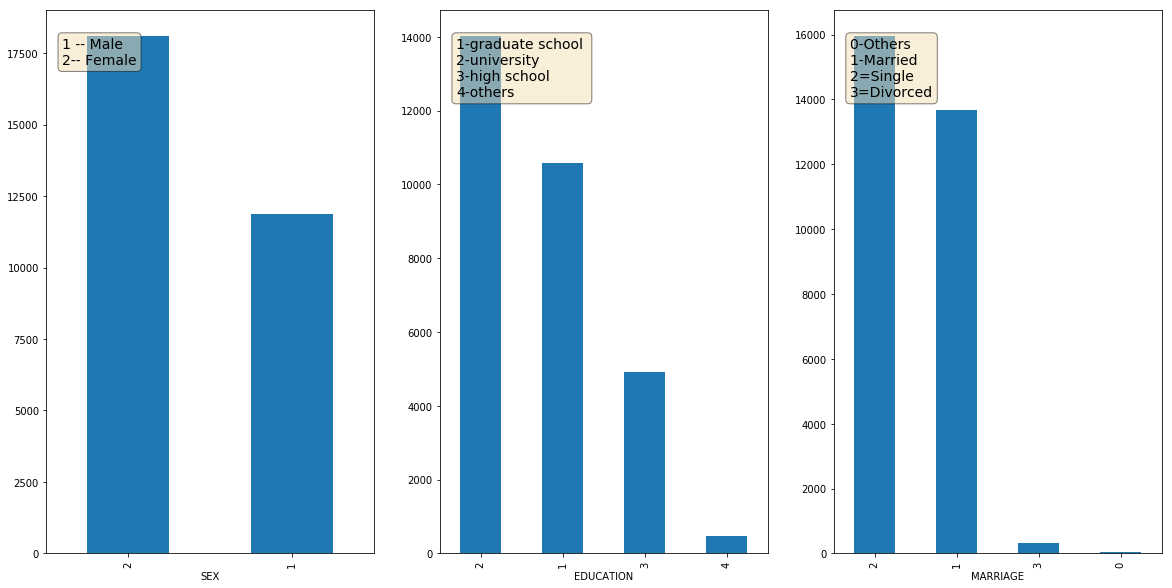

In [45]:
# Exploratory data Analysis
# Categorical Variables
# Plotting Status Predictors

import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,1)
textstr = '1 -- Male \n2-- Female'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
df["SEX"].value_counts().plot("bar")
plt.xlabel("SEX")
plt.text(0.05, 0.95, textstr, fontsize=14,transform = ax.transAxes,horizontalalignment='left',verticalalignment='top',bbox=props)
ax = fig.add_subplot(1,3,2)
textstr1 = '1-graduate school \n2-university\n3-high school\n4-others'
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
df["EDUCATION"].value_counts().plot("bar")
plt.xlabel("EDUCATION")
plt.text(0.05, 0.95, textstr1, fontsize=14,transform = ax.transAxes,horizontalalignment='left',verticalalignment='top',bbox=props1)
ax = fig.add_subplot(1,3,3)
df["MARRIAGE"].value_counts().plot("bar")
plt.xlabel("MARRIAGE")
textstr2 = '0-Others \n1-Married \n2=Single \n3=Divorced'
props2 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr2, fontsize=14,transform = ax.transAxes,horizontalalignment='left',verticalalignment='top',bbox=props2)
plt.show()

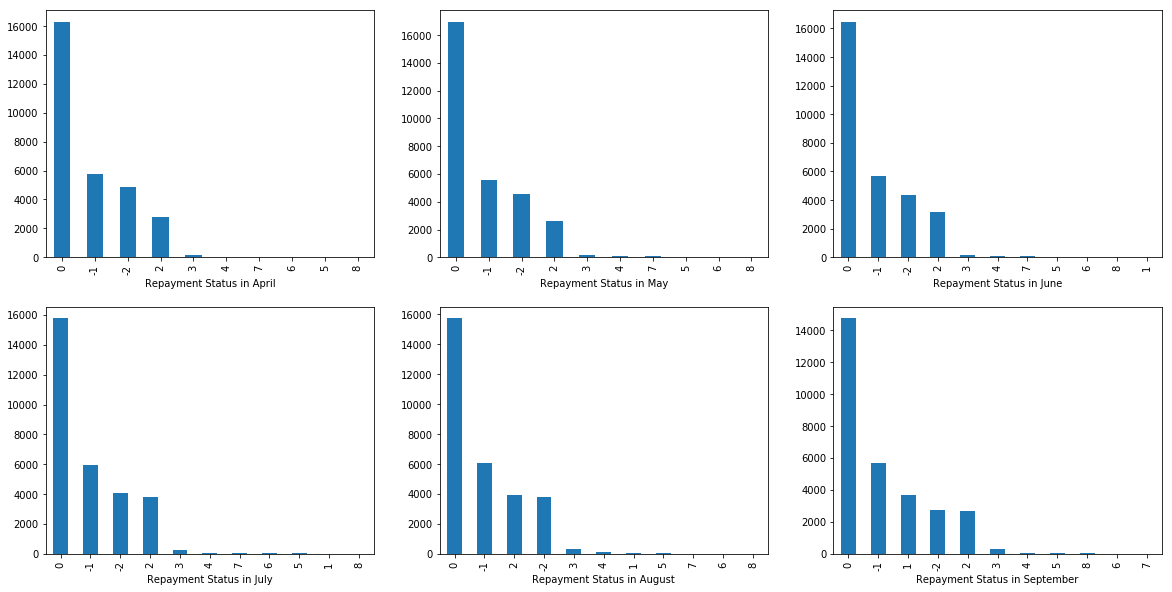

In [46]:
# Categorical variable - Repayment
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,3,1)
df["Repayment_Apr"].value_counts().plot("bar")
plt.xlabel("Repayment Status in April")
ax = fig.add_subplot(2,3,2)
df["Repayment_May"].value_counts().plot("bar")
plt.xlabel("Repayment Status in May")
ax = fig.add_subplot(2,3,3)
df["Repayment_June"].value_counts().plot("bar")
plt.xlabel("Repayment Status in June")
ax = fig.add_subplot(2,3,4)
df["Repayment_July"].value_counts().plot("bar")
plt.xlabel("Repayment Status in July")
ax = fig.add_subplot(2,3,5)
df["Repayment_Aug"].value_counts().plot("bar")
plt.xlabel("Repayment Status in August")
ax = fig.add_subplot(2,3,6)
df["Repayment_Sept"].value_counts().plot("bar")
plt.xlabel("Repayment Status in September")
plt.show()

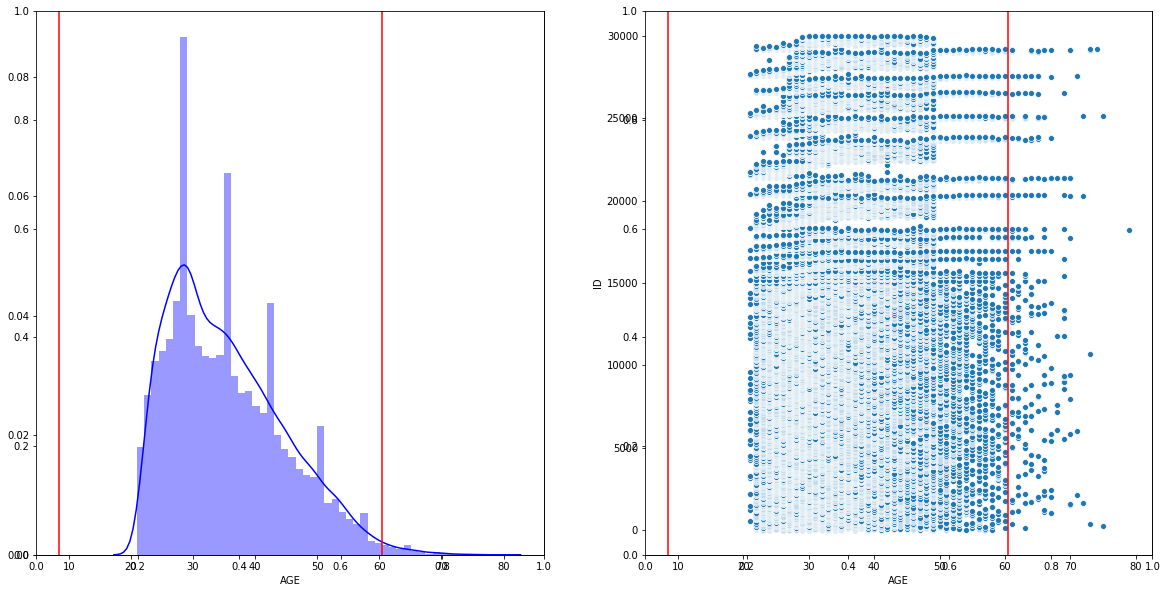

In [48]:
#Numerical Variables
# Age
# Calculating cutoff using Rule of Thumbs
import numpy as np
import seaborn as sns
q1, q3= np.percentile(df["AGE"],[25,75])
iqr = q3-q1
lower_bound2 = q1 -(1.5 * iqr) 
upper_bound2 = q3 +(1.5 * iqr) 
fig, ax = plt.subplots(1, 2,figsize=(20,10))
ax = fig.add_subplot(1,2,1)
sns.distplot(df["AGE"],kde=True,color="blue")
plt.axvline(x=upper_bound2,color="red")
plt.axvline(x=lower_bound2,color="red")
ax = fig.add_subplot(1,2,2)
sns.scatterplot(x=df["AGE"],y=df["ID"])
plt.axvline(x=upper_bound2,color="red")
plt.axvline(x=lower_bound2,color="red")
plt.show()

In [49]:
#Number of datapoints that will be removed
df["ID"][df["AGE"]>upper_bound2].count() # 272
#Perecentage of data that will be removed
(df["ID"][df["AGE"]>upper_bound2].count()/df["ID"].count())*100 
#Only 0.91% data will be removed

0.9067271151410095

In [50]:
#Imputing the outliers from AGE column
df_new = df[df["AGE"]<upper_bound2]

In [51]:
df_new.shape

(29726, 25)

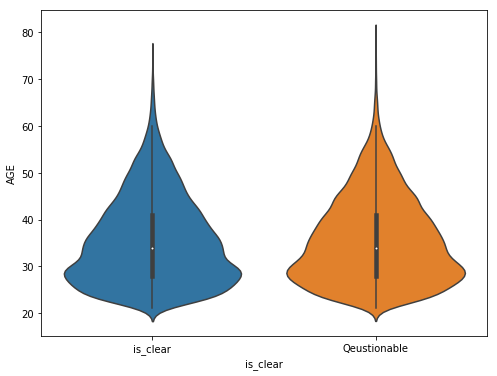

In [52]:
# From the above scatter plot we can see that above index 15000 ,It looks like table forming was changed for these customers and a data provider started to populate it by packs of data with some order by Age.
# We need to see that both parts have same statistical properties

import seaborn as sns
import matplotlib.pyplot as plt
df_age = pd.DataFrame({},index=[])
df_age["is_clear"] = ['is_clear' if x<=15000 else 'Qeustionable' for x in df["ID"]]
df_new1 = pd.concat([df_age,df["AGE"]],axis=1,sort=False)
table=pd.crosstab(df_new1["AGE"],df_new1["is_clear"])
plt.figure(figsize=(8, 6))
sns.violinplot(x= df_new1["is_clear"],y=df_new1["AGE"]) 
plt.show()

# We found that the statistical properties(mean,1st & 3rd quartile values) are fairly similar therefore,the data is consistent

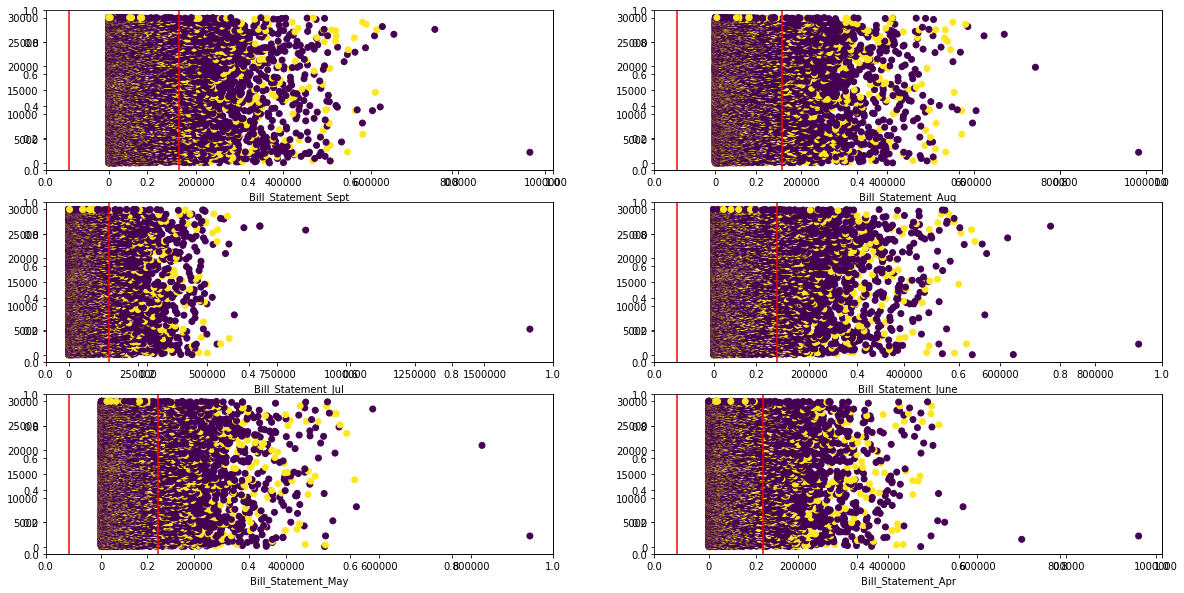

In [53]:
# Bill_Statement variable
# Applying Rule of thumb approach
# Numeric Variable
import numpy as np
lower_bound = []
upper_bound = []
percentage_removed = []
fig, ax = plt.subplots(3, 2,figsize=(20,10))
labels = ["Bill_Statement_Sept","Bill_Statement_Aug","Bill_Statement_Jul","Bill_Statement_June","Bill_Statement_May","Bill_Statement_Apr"]
for i in range(0,6):
    q1, q3= np.percentile(df_new[labels[i]],[25,75])
    iqr = q3-q1
    lower_bound.append(q1 -(1.5 * iqr)) 
    upper_bound.append(q3 +(1.5 * iqr))
    percentage_removed.append((((df_new["ID"][df_new[labels[i]]<lower_bound[i]]).count() + (df_new["ID"][df[labels[i]]>upper_bound[i]]).count())/df_new["ID"].count())*100)
    ax = fig.add_subplot(3,2,i+1)
    plt.scatter(x=df_new[labels[i]],y=df_new["ID"],c=df_new["default.payment.next.month"])
    plt.xlabel(labels[i])
    plt.axvline(x=upper_bound[i],color="red")
    plt.axvline(x=lower_bound[i],color="red") 
plt.show()

In [54]:
# Number of datapoints that will be removed if we take these cutoffs
pd.DataFrame(list(zip(labels,percentage_removed)),columns=["Bill Statements Months","Percentage of Data Removed"])
# We cannot take these as percentage of data removed>5%

Bill Statements Months  Percentage of Data Removed
0    Bill_Statement_Sept                    7.942542
1     Bill_Statement_Aug                    7.982911
2     Bill_Statement_Jul                    8.218395
3    Bill_Statement_June                    8.702819
4     Bill_Statement_May                    9.035861
5     Bill_Statement_Apr                    8.911391

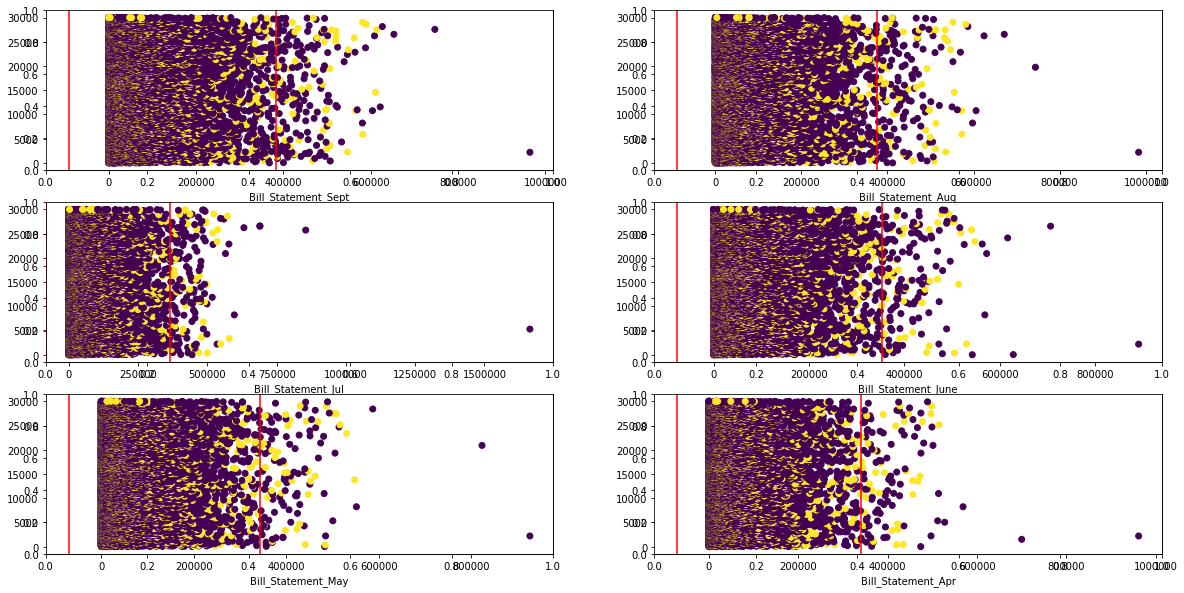

In [55]:
#We can take impute values below lower_Bound through rule of thumb and upper bound + 220000
upper_bound_inc = [x+220000 for x in upper_bound]
percentage_removed_inc = []
fig, ax = plt.subplots(3, 2,figsize=(20,10))
labels = ["Bill_Statement_Sept","Bill_Statement_Aug","Bill_Statement_Jul","Bill_Statement_June","Bill_Statement_May","Bill_Statement_Apr"]
for i in range(0,6):
    percentage_removed_inc.append((((df_new["ID"][df_new[labels[i]]<lower_bound[i]]).count() + (df_new["ID"][df_new[labels[i]]>upper_bound_inc[i]]).count())/df_new["ID"].count())*100)   
    ax = fig.add_subplot(3,2,i+1)
    plt.scatter(x=df_new[labels[i]],y=df_new["ID"],c=df_new["default.payment.next.month"])
    plt.xlabel(labels[i])
    plt.axvline(x=upper_bound_inc[i],color="red")
    plt.axvline(x=lower_bound[i],color="red")  
plt.show()

In [56]:
# Number of datapoints that will be removed if we take these cutoffs
pd.DataFrame(list(zip(labels,percentage_removed_inc)),columns=["Bill Statements Months","Percentage of Data Removed"])
# Now we can see that now percentage data_points removed are well less than 5%

Bill Statements Months  Percentage of Data Removed
0    Bill_Statement_Sept                    0.676176
1     Bill_Statement_Aug                    0.642535
2     Bill_Statement_Jul                    0.629079
3    Bill_Statement_June                    0.558434
4     Bill_Statement_May                    0.457512
5     Bill_Statement_Apr                    0.433964

In [57]:
#Imputing the outliers from Bill Statement Columns
labels = ["Bill_Statement_Sept","Bill_Statement_Aug","Bill_Statement_Jul","Bill_Statement_June","Bill_Statement_May","Bill_Statement_Apr"]
for i in range(0,6):
    df_new = df_new[df_new[labels[i]]<upper_bound_inc[i]] 
    df_new = df_new[df_new[labels[i]]>lower_bound[i]]

In [58]:
df_new.shape

(29420, 25)

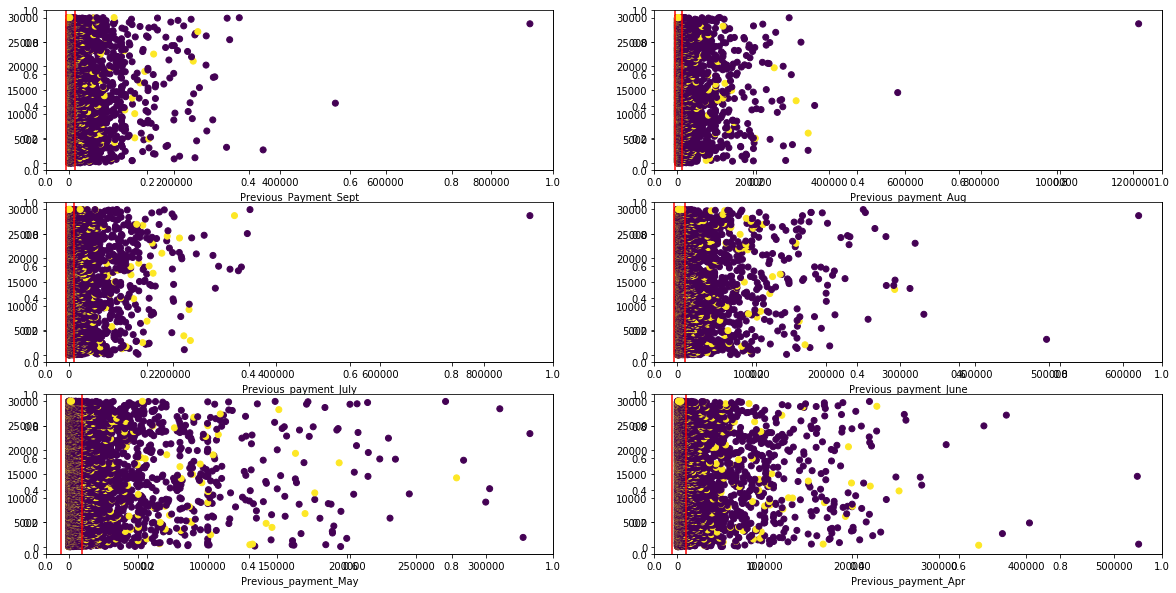

In [59]:
# Pervious Payment  
lower_bound1 = []
upper_bound1 = []
percentage_removed = []
fig, ax = plt.subplots(3, 2,figsize=(20,10))
labels1 = ["Previous_Payment_Sept","Previous_payment_Aug","Previous_payment_July","Previous_payment_June","Previous_payment_May","Previous_payment_Apr"]  

for i in range(0,6):
    q1, q3= np.percentile(df_new[labels1[i]],[25,75])
    iqr = q3-q1
    lower_bound1.append(q1 -(1.5 * iqr)) 
    upper_bound1.append(q3 +(1.5 * iqr))
    percentage_removed.append((((df_new["ID"][df_new[labels1[i]]<lower_bound1[i]]).count() + (df_new["ID"][df_new[labels1[i]]>upper_bound1[i]]).count())/df_new["ID"].count())*100)
    ax = fig.add_subplot(3,2,i+1)
    plt.scatter(x=df_new[labels1[i]],y=df_new["ID"],c=df_new["default.payment.next.month"])
    plt.xlabel(labels1[i])
    plt.axvline(x=upper_bound1[i],color="red")
    plt.axvline(x=lower_bound1[i],color="red")  
plt.show()

In [60]:
# Number of datapoints that will be removed if we take these cutoffs
pd.DataFrame(list(zip(labels1,percentage_removed)),columns=["Previous Payment Months ","Percentage of Data Removed"])
# We cannot take these as percentage of data removed>5%

Previous Payment Months   Percentage of Data Removed
0    Previous_Payment_Sept                    8.416044
1     Previous_payment_Aug                    8.317471
2    Previous_payment_July                    8.331067
3    Previous_payment_June                    9.357580
4     Previous_payment_May                    9.228416
5     Previous_payment_Apr                    9.208022

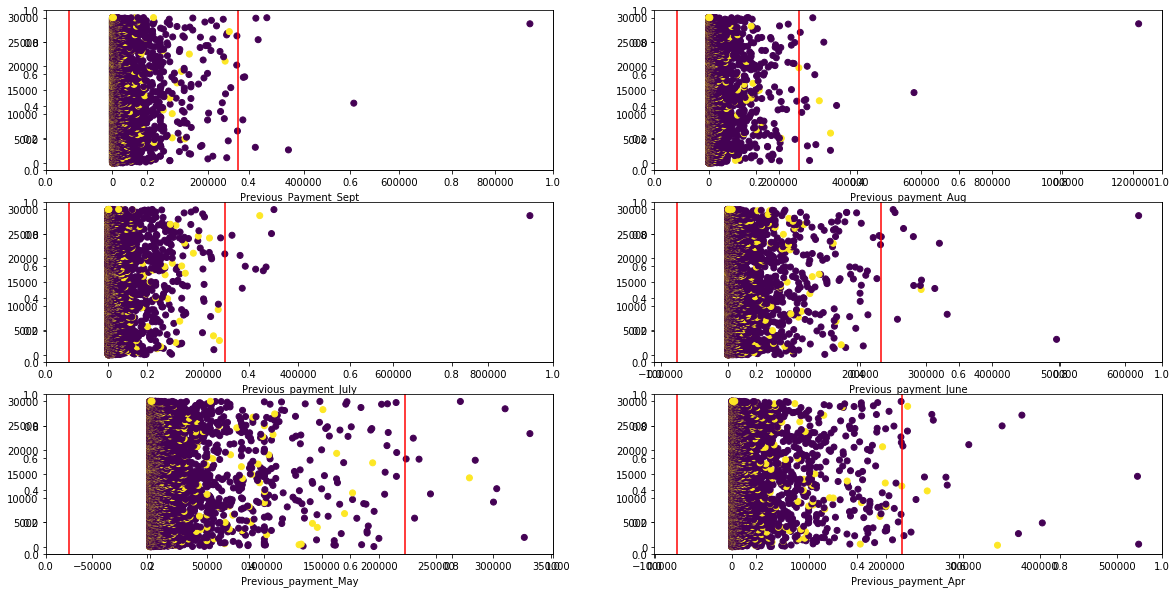

In [61]:
#We can take impute values below lower_Bound through rule of thumb and upper bound + 100000
upper_bound_inc1 = [x+100000 for x in upper_bound]
percentage_removed_inc = []
fig, ax = plt.subplots(3, 2,figsize=(20,10))
labels1 = ["Previous_Payment_Sept","Previous_payment_Aug","Previous_payment_July","Previous_payment_June","Previous_payment_May","Previous_payment_Apr"]
for i in range(0,6):
    percentage_removed_inc.append((((df_new["ID"][df_new[labels1[i]]<lower_bound[i]]).count() + (df_new["ID"][df_new[labels1[i]]>upper_bound_inc1[i]]).count())/df_new["ID"].count())*100)
    ax = fig.add_subplot(3,2,i+1)
    plt.scatter(x=df_new[labels1[i]],y=df_new["ID"],c=df_new["default.payment.next.month"])
    plt.xlabel(labels1[i])
    plt.axvline(x=upper_bound_inc1[i],color="red")
    plt.axvline(x=lower_bound[i],color="red") 
plt.show()

In [62]:
# Number of datapoints that will be removed if we take these cutoffs
pd.DataFrame(list(zip(labels1,percentage_removed_inc)),columns=["Previous Payment Months","Percentage of Data Removed"])
# Now we can see that now percentage data_points removed are well less than 5%

Previous Payment Months  Percentage of Data Removed
0   Previous_Payment_Sept                    0.033990
1    Previous_payment_Aug                    0.064582
2   Previous_payment_July                    0.040789
3   Previous_payment_June                    0.047587
4    Previous_payment_May                    0.044188
5    Previous_payment_Apr                    0.071380

In [63]:
#Imputing the outliers from Previous Payment Columns
labels1 = ["Previous_Payment_Sept","Previous_payment_Aug","Previous_payment_July","Previous_payment_June","Previous_payment_May","Previous_payment_Apr"]
for i in range(0,6):
    df_new = df_new[df_new[labels1[i]]<upper_bound_inc1[i]] 
    df_new = df_new[df_new[labels1[i]]>lower_bound[i]]

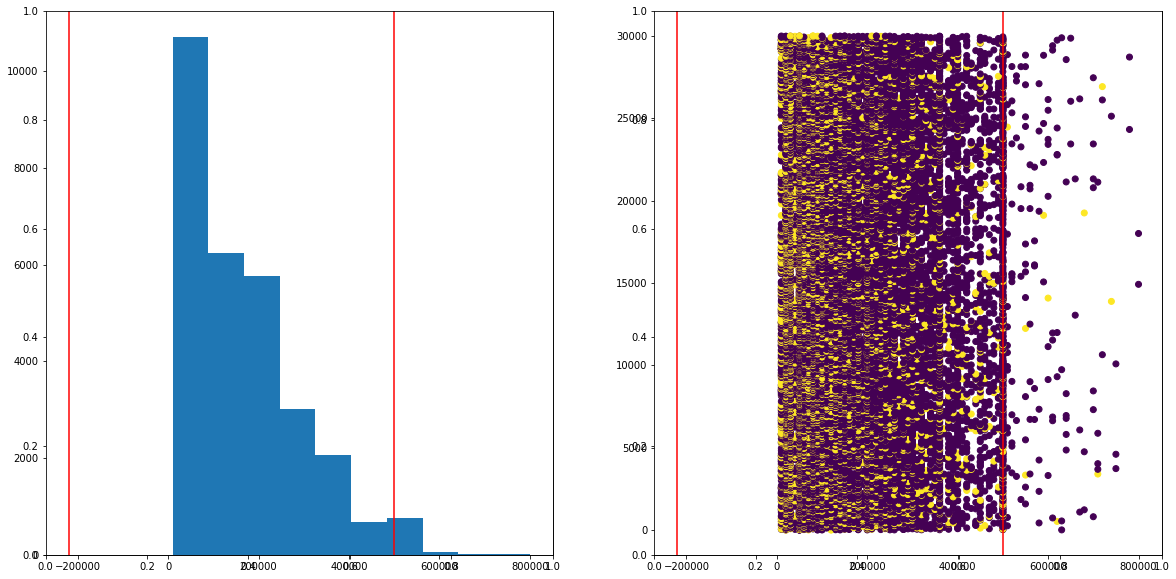

In [64]:
# Limit of Balance
q1, q3= np.percentile(df_new["LIMIT_BAL"],[25,75])
iqr = q3-q1
lower_bound3 = q1 -(1.5 * iqr) 
upper_bound3 = q3 +(1.5 * iqr) 
fig, ax = plt.subplots(1, 2,figsize=(20,10))
ax = fig.add_subplot(1,2,1)
plt.hist(df_new["LIMIT_BAL"])
plt.axvline(x=upper_bound3,color="red")
plt.axvline(x=lower_bound3,color="red")
ax = fig.add_subplot(1,2,2)
plt.scatter(x=df_new["LIMIT_BAL"],y=df_new["ID"],c=df_new["default.payment.next.month"])
plt.axvline(x=upper_bound3,color="red")
plt.axvline(x=lower_bound3,color="red")
plt.show()

In [67]:
#Imputing the outliers from Limit Balance
df_new = df_new[df_new["LIMIT_BAL"]<upper_bound3] 
df_new = df_new[df_new["LIMIT_BAL"]>lower_bound3]
df_new.reset_index(drop=True,inplace=True)

In [61]:
# Bivariate Analysis - Aim to find out discriminatory power of variables and for creating and testing hypothesis

In [62]:
# Hypothesis based on experience 
# females have less credit delinquency risk as compared to that of males due to their precautionary motives 
# Older people have less credit delinquency risk due to their precautionary motives. So we can expect deafult rate to decrease with age  
# Married clients tend to pay back their loans faster. So we expect that married clients pay their installments on time.
# Less educted individuals have higher probability to default(maybe due to lack of maturity and knowledge)

In [63]:
# Limit Balance is the credit limit assigned to that person. Credit limit is decided on basis of credit score which in turn is 
# based on number of factors such as income, education marital status etc.

In [68]:
df_new.shape

(28557, 25)

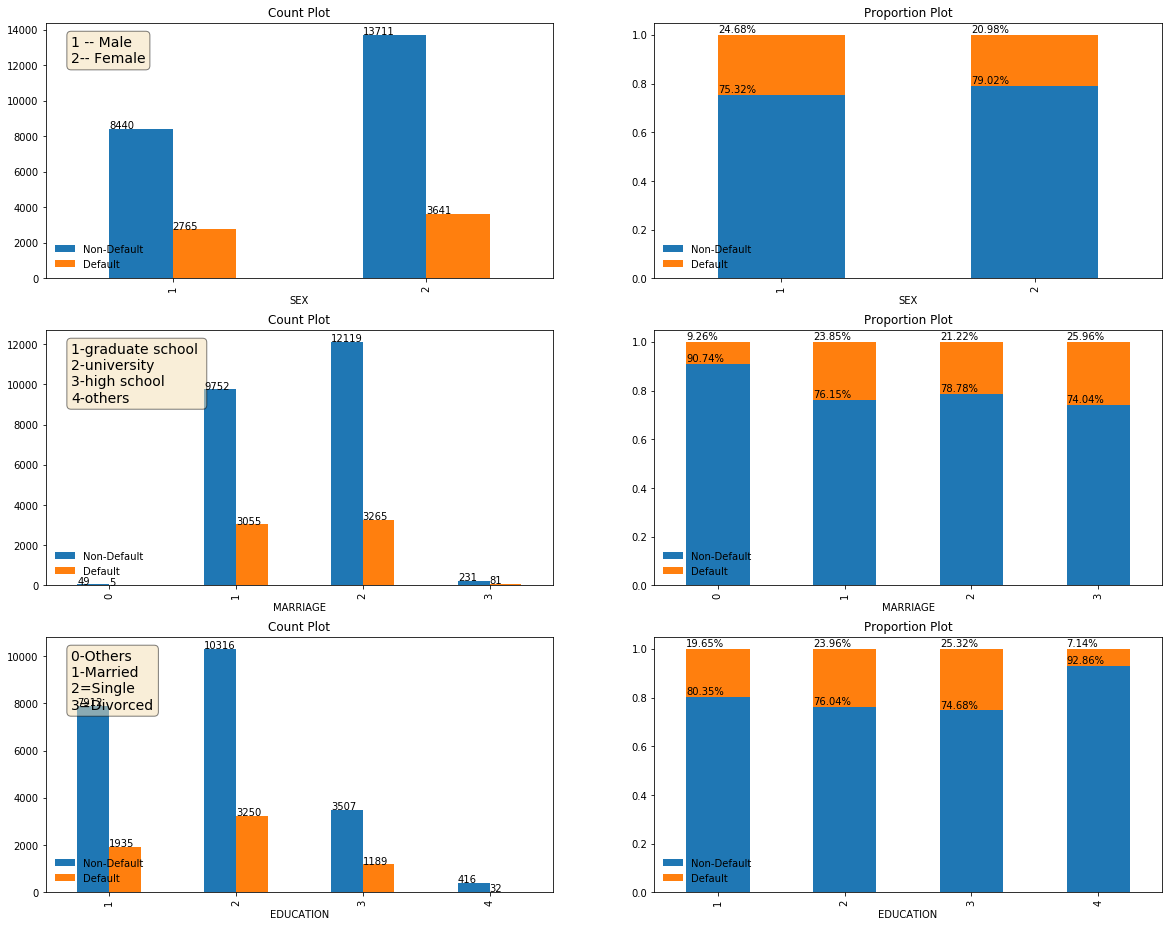

In [69]:
fig= plt.figure(figsize=(20,16))
labels_x = ["SEX","MARRIAGE","EDUCATION"]
text_str = ['1 -- Male \n2-- Female','1-graduate school \n2-university\n3-high school\n4-others','0-Others \n1-Married \n2=Single \n3=Divorced']
for i in range(0,6):
    if i%2==0:
        ax = fig.add_subplot(3,2,i+1)
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        pd.crosstab(df_new[labels_x[i//2]],df_new["default.payment.next.month"]).plot(kind='bar',ax=ax)
        plt.title("Count Plot")
        plt.xlabel(labels_x[i//2])
        plt.legend(["Non-Default","Default"],loc='lower left',frameon=False)
        plt.text(0.05, 0.95, text_str[i//2], fontsize=14,transform = ax.transAxes,horizontalalignment='left',verticalalignment='top',bbox=props)
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate('{0}'.format(height), (x, y + height + 0.01))
    else:
        ax = fig.add_subplot(3,2,i+1)
        table = pd.crosstab(df_new[labels_x[(i-1)//2]],df_new["default.payment.next.month"])
        pd.crosstab(df_new[labels_x[(i-1)//2]],df_new["default.payment.next.month"]).div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,ax=ax)
        plt.title("Proportion Plot")
        plt.xlabel(labels_x[(i-1)//2])
        plt.legend(["Non-Default","Default"],loc='lower left',frameon=False)
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate('{:.2%}'.format(height), (x, y + height + 0.01))
plt.show()

# We found that ptoportion of defaults are approximately same for both sexes

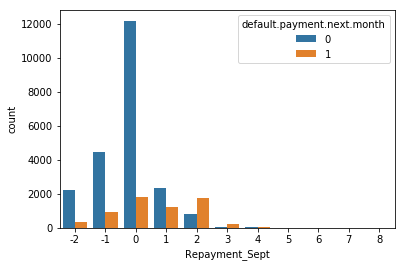

In [70]:
sns.countplot(x='Repayment_Sept',hue="default.payment.next.month",data=df_new)
plt.show()

<Figure size 1152x576 with 0 Axes>

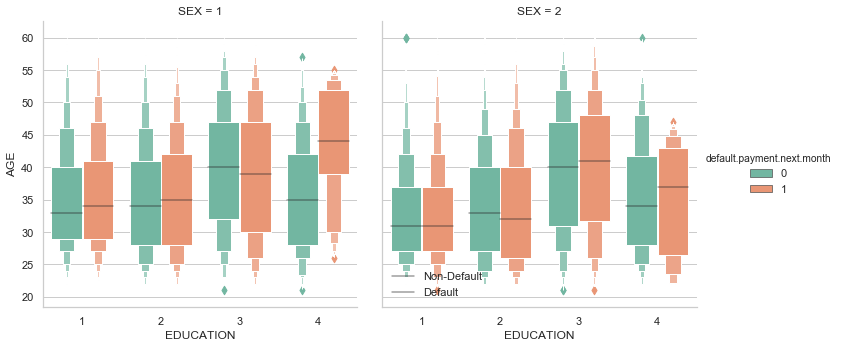

In [71]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid", color_codes=True)
ax = sns.catplot(x="EDUCATION",y="AGE",hue="default.payment.next.month",col="SEX",data=df_new,palette="Set2",kind='boxen',dodge=True)
plt.legend(["Non-Default","Default"],loc='lower left',frameon=False)
plt.show() 

In [ ]:
#Conclusions from above plot:-
# For both males and females others class in education 

<Figure size 720x360 with 0 Axes>

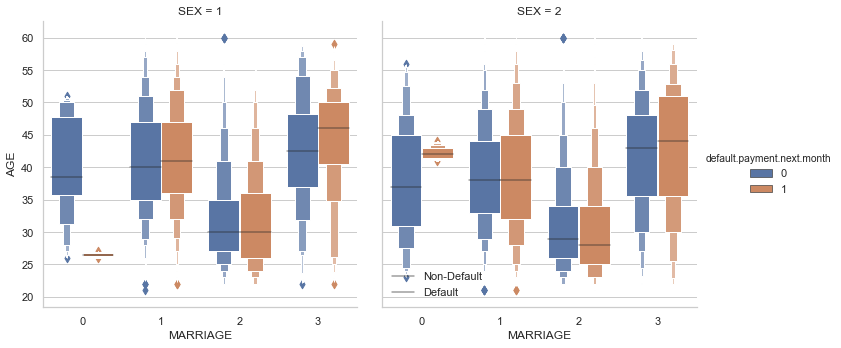

In [72]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid", color_codes=True)
ax = sns.catplot(x="MARRIAGE",y="AGE",hue="default.payment.next.month",col="SEX",data=df_new,kind='boxen',dodge=True)
plt.legend(["Non-Default","Default"],loc='lower left',frameon=False)
plt.show() 

In [73]:
# Creating Bins for age 

df_new["age_f"] = 1
i = 0
for x in df_new["AGE"]:
    if ((x >=20) and (x<=37)):
        df_new.loc[i,"age_f"] = "AGE 20-35" 
    elif ((x>37) and (x<=45)):
        df_new.loc[i,"age_f"] = "AGE 35-45"
    elif x > 45:
        df_new.loc[i,"age_f"] = "AGE greater than 45"
    i = i+1

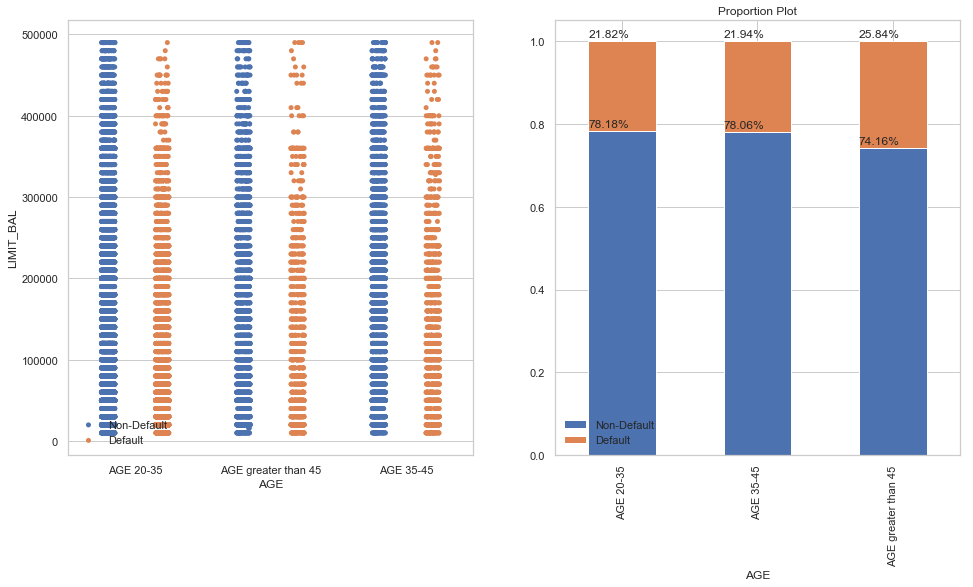

In [74]:
fig= plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,1)
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="age_f",y="LIMIT_BAL",hue="default.payment.next.month",data=df_new,dodge=True,ax=ax)
plt.legend(["Non-Default","Default"],loc='lower left',frameon=False)
plt.xlabel("AGE")
ax = fig.add_subplot(1,2,2)
table = pd.crosstab(df_new["age_f"],df_new["default.payment.next.month"])
pd.crosstab(df_new["age_f"],df_new["default.payment.next.month"]).div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,ax=ax)
plt.title("Proportion Plot")
plt.xlabel("AGE")
plt.legend(["Non-Default","Default"],loc='lower left',frameon=False)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (x, y + height + 0.01))
plt.show() 

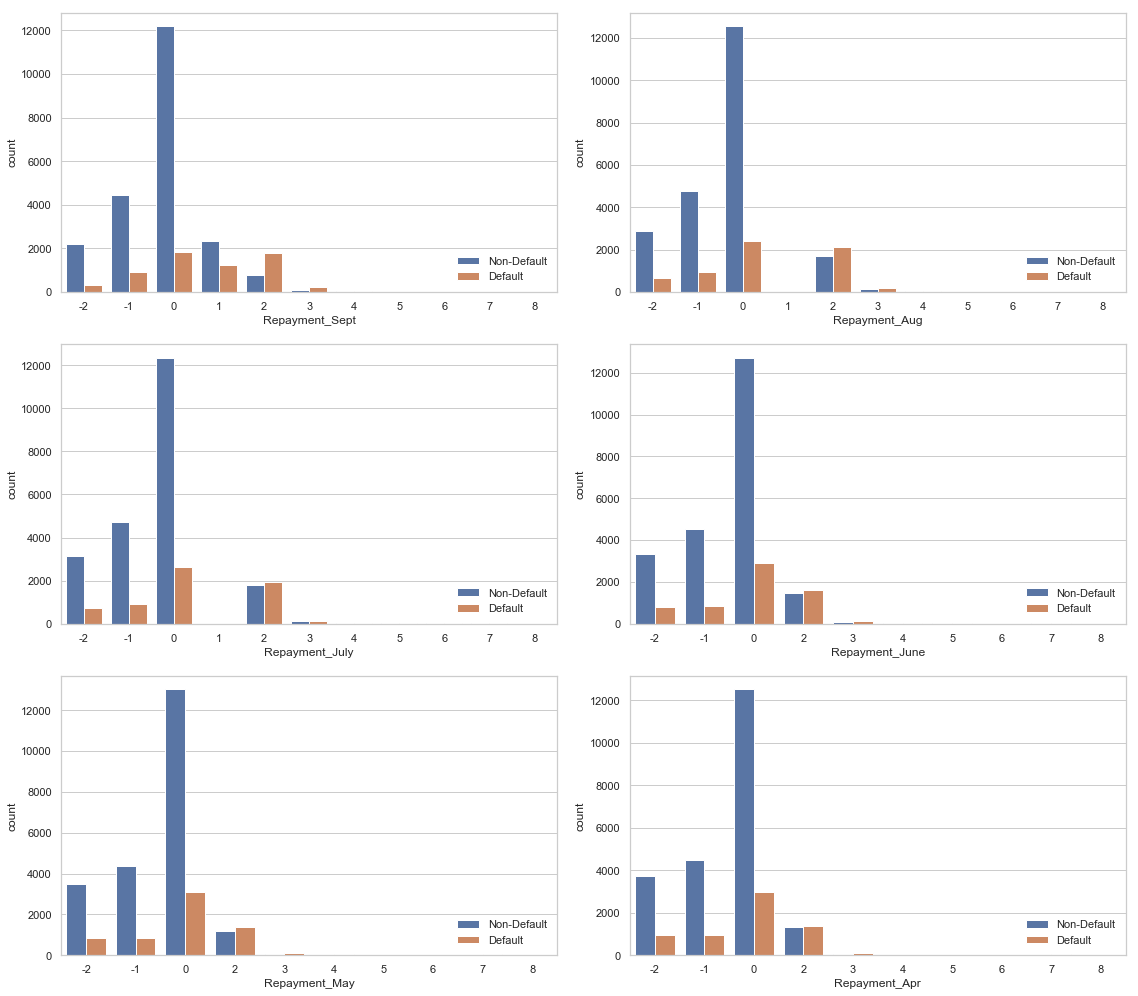

In [78]:
fig = plt.figure(figsize=(16,14))
labels2 = ['Repayment_Sept','Repayment_Aug','Repayment_July','Repayment_June','Repayment_May','Repayment_Apr']  
for i in range(0,6):
    ax = fig.add_subplot(3,2,i+1)
    plt.tight_layout()
    sns.countplot(x=labels2[i],hue="default.payment.next.month",data=df_new)
    plt.legend(["Non-Default","Default"],loc='lower right',frameon=False)
plt.show()

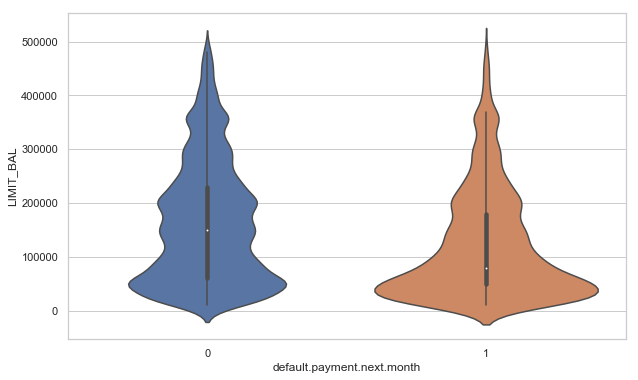

In [79]:
# Limit of balance 
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x= df_new["default.payment.next.month"],y=df_new["LIMIT_BAL"]) 
plt.show()

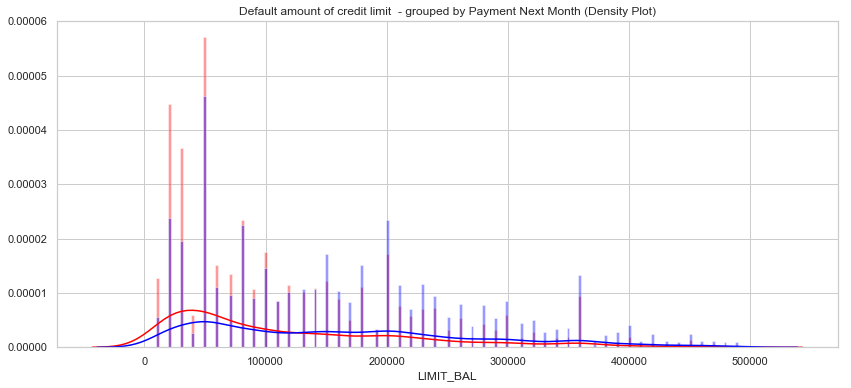

In [80]:
class_0 = df_new.loc[df_new['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = df_new.loc[df_new['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde = True,bins=200, color="red")
sns.distplot(class_0,kde=True, bins=200, color="blue")
plt.show()

In [81]:
# Making some new Features Utilization Rate
# We cannot define the true utilization rate here as how much the client owes to bank is not known but we can calculate 
#a representative Utilization rate using this these six months data
# Limit Utilization- Rate = ((SUM(BILL_STATEMENT(April to August)- PREVIOUS_PAYMENT(May to Sept)))/LIMIT BALANCE)*100
# Negative Utilization means these customers might have defaulted before these six months and now paying back credited amount
# Those who have defaulted with zero utilization rate means they have defaulted in past and are restricted from further transactions
df_new["Utilization Rate"] = 1
for i in range(len(df_new["ID"])):
    util_rate = (((df_new.iloc[i,13]+df_new.iloc[i,14]+df_new.iloc[i,15]+df_new.iloc[i,16]+df_new.iloc[i,17])-(df_new.iloc[i,18]+df_new.iloc[i,19]+df_new.iloc[i,20]+df_new.iloc[i,21]+df_new.iloc[i,22]))/df_new.iloc[i,1])*100
    if util_rate <=50 and util_rate >=0:
        df_new.loc[i,"Utilization Rate"] = "Low Utilization"
    elif (util_rate >50 and util_rate <=75):
        df_new.loc[i,"Utilization Rate"] = "Moderate Utilization"
    elif (util_rate >75 and util_rate <=100):
        df_new.loc[i,"Utilization Rate"] = "High Utilization"
    elif util_rate <0:
        df_new.loc[i,"Utilization Rate"] = "Paying off earlier debt"
    elif util_rate >100:
        df_new.loc[i,"Utilization Rate"] = "Limit Exceeded"

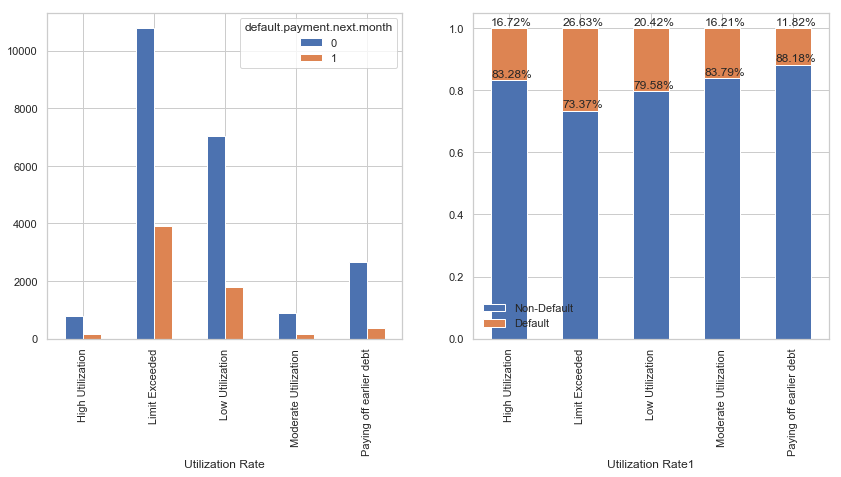

In [82]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1)
pd.crosstab(df_new["Utilization Rate"],df_new["default.payment.next.month"]).plot(kind="bar",ax=ax) 
plt.xlabel("Utilization Rate")
ax = fig.add_subplot(1,2,2)
table = pd.crosstab(df_new["Utilization Rate"],df_new["default.payment.next.month"])
pd.crosstab(df_new["Utilization Rate"],df_new["default.payment.next.month"]).div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,ax=ax)
plt.xlabel("Utilization Rate1")
plt.legend(["Non-Default","Default"],loc='lower left',frameon=False)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (x, y + height + 0.01))
plt.show()

In [83]:
# Creating another variable - Carry Forward Rate - What percent of bill amount of this month is carried forward for next month
# Carry Forward Rate = (SUM(BILL_STATEMENT(April to August)- PREVIOUS_PAYMENT(May to Sept))/SUM(BILL_STATEMENT(April to August))*100
df_new["Carry Forward Rate"] = 1
for i in range(len(df_new["ID"])):
    sum_bill_statement = (df_new.iloc[i,13]+df_new.iloc[i,14]+df_new.iloc[i,15]+df_new.iloc[i,16]+df_new.iloc[i,17])
    sum_previous_pay = (df_new.iloc[i,18]+df_new.iloc[i,19]+df_new.iloc[i,20]+df_new.iloc[i,21]+df_new.iloc[i,22])
    diff = (sum_bill_statement-sum_previous_pay)
    carry_rate = (diff/sum_bill_statement)*100
    if  carry_rate <=5:   
        df_new.iloc[i,27] = "Low Carry"  
    elif carry_rate >5 and carry_rate <=45:
        df_new.iloc[i,27] = "Moderate Carry"
    elif (carry_rate >45 and carry_rate <=100) or diff <0 :
        df_new.iloc[i,27] = "High Carry"
    elif sum_bill_statement ==0 and sum_previous_pay == 0:
        df_new.iloc[i,27] = "No Consumption Default in past"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


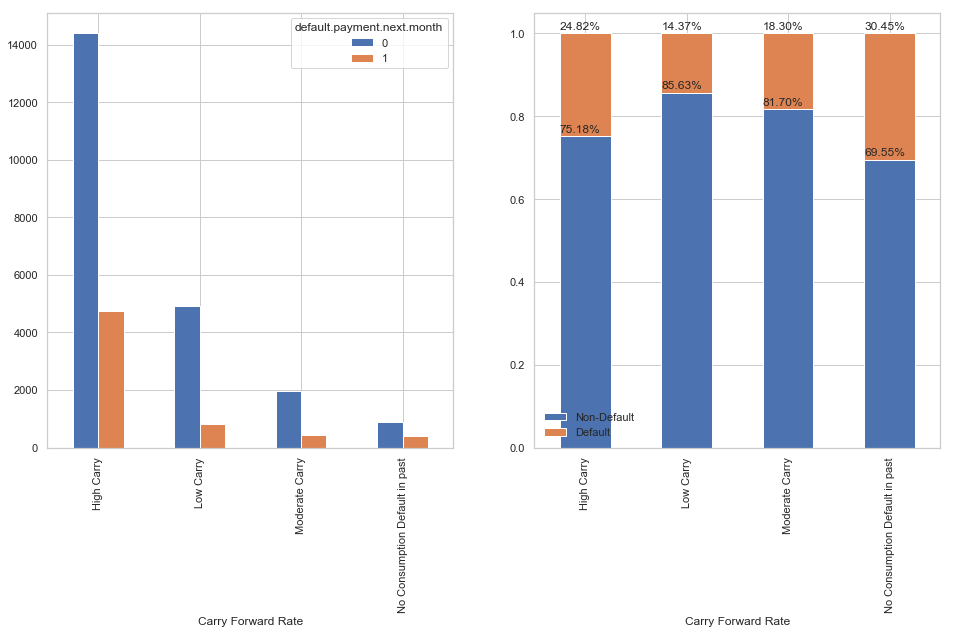

In [84]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,1)
pd.crosstab(df_new["Carry Forward Rate"],df_new["default.payment.next.month"]).plot(kind="bar",ax=ax) 
plt.xlabel("Carry Forward Rate")
ax = fig.add_subplot(1,2,2)
table = pd.crosstab(df_new["Carry Forward Rate"],df_new["default.payment.next.month"])
pd.crosstab(df_new["Carry Forward Rate"],df_new["default.payment.next.month"]).div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,ax=ax)
plt.xlabel("Carry Forward Rate")
plt.legend(["Non-Default","Default"],loc='lower left',frameon=False)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (x, y + height + 0.01))
plt.show()

In [156]:
# Comparing mean and median values for default and non default users
df_mean = df_new.iloc[:,[12,13,14,15,16,17,18,19,20,21,22,23,24]].groupby("default.payment.next.month").agg(np.mean).transpose()
df_median = df_new.iloc[:,[12,13,14,15,16,17,18,19,20,21,22,23,24]].groupby("default.payment.next.month").agg(np.median).transpose()
df_mean.index = ["Bill_AMT1","Bill_AMT2","Bill_AMT3","Bill_AMT4","Bill_AMT5","Bill_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
df_median.index = ["Bill_AMT1","Bill_AMT2","Bill_AMT3","Bill_AMT4","Bill_AMT5","Bill_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
fig= plt.figure(figsize=(15,6))
plt.tight_layout()
ax = fig.add_subplot(2,2,1)
df_mean.iloc[[0,1,2,3,4,5],:].plot(kind='line',ax=ax)
plt.title("VARIATION OF MEAN FOR DEFAULTS AND NON DEFAULTS")
ax = fig.add_subplot(2,2,2)
df_median.iloc[[0,1,2,3,4,5],:].plot(kind='line',ax=ax)
plt.title("VARIATION OF MEDIAN FOR DEFAULTS AND NON DEFAULTS")
ax = fig.add_subplot(2,2,3)
df_mean.iloc[[6,7,8,9,10,11],:].plot(kind='line',ax=ax)
ax = fig.add_subplot(2,2,4)
df_median.iloc[[6,7,8,9,10,11],:].plot(kind='line',ax=ax)
# with time both median bill payment and previous payments have decresed.

In [85]:
df_new.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Repayment_Sept', 'Repayment_Aug', 'Repayment_July', 'Repayment_June',
       'Repayment_May', 'Repayment_Apr', 'Bill_Statement_Sept',
       'Bill_Statement_Aug', 'Bill_Statement_Jul', 'Bill_Statement_June',
       'Bill_Statement_May', 'Bill_Statement_Apr', 'Previous_Payment_Sept',
       'Previous_payment_Aug', 'Previous_payment_July',
       'Previous_payment_June', 'Previous_payment_May', 'Previous_payment_Apr',
       'default.payment.next.month', 'age_f', 'Utilization Rate',
       'Carry Forward Rate'],
      dtype='object')

C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
# Let's take a look at Correlation

In [123]:
# We can see that there are strong correlation between the Bill_Statements
corr = df_new.iloc[:,[1,5,12,13,14,15,16,17,18,19,20,21,22,23]].corr()
corr.style.background_gradient(cmap='coolwarm')

In [160]:
# We can find the correlation between categorical variables using chi square test. Chi square statistic just compares the frequency of the obseved and expected values of combination of categotical variable
# Two test can be performed using chi-square test- test of independence(we test the null hypothesis that one categoricalvariable is strongly explained by other) & goodness of fit
# For this we make contingency table (basically frequency table)
# Chi-Square Test
from scipy import stats
df_chi = pd.DataFrame({},index=[])
def chi_square(x,y,alpha=0.05):
    col1 = df_new[x]
    col2 = df_new[y]
    contingency_table = pd.crosstab(col1,col2,margins = True)
    chi,p,dof = stats.chi2_contingency(contingency_table.values)[0:3]
    p_value = p
    chi_value =chi
    if(p_value <= alpha):
        #print("{0} & {1} have strong relationship with p value {2}".format(x,y,p_value))
        df_chi.at[i,"Variable 1"] = x
        df_chi.at[i,"Variable 2"] = y
        df_chi.at[i,"P Value"] = p_value
        
    #print("{0} & {1} chi_value {2} -- p_value {3} -- DOF {4}".format(x,y,chi_value,p_value,dof))   

testColumns = ['SEX','EDUCATION','MARRIAGE',"Repayment_Sept","Repayment_Aug","Repayment_July","Repayment_June","Repayment_May","Repayment_Apr","default.payment.next.month","age_f","Utilization Rate","Carry Forward Rate"]              

i=0
for col1 in range(12):
    for col2 in range(col1+1,13):
        chi_square(testColumns[col1],testColumns[col2],i)
        i = i+1

df_chi
# We found that all categorical variables are highly correlated

Variable 1                  Variable 2        P Value
1                          SEX                    MARRIAGE   2.721571e-07
2                          SEX              Repayment_Sept   6.456017e-19
3                          SEX               Repayment_Aug   7.298701e-26
4                          SEX              Repayment_July   2.779856e-21
5                          SEX              Repayment_June   1.509127e-17
6                          SEX               Repayment_May   5.348857e-13
7                          SEX               Repayment_Apr   7.629830e-08
8                          SEX  default.payment.next.month   1.632856e-12
9                          SEX                       age_f   1.352004e-24
10                         SEX            Utilization Rate   1.115459e-36
11                         SEX          Carry Forward Rate   4.326732e-24
12                   EDUCATION                    MARRIAGE  6.745299e-242
13                   EDUCATION              Repayment_Sept  2.850463e-208
14                   EDUCATION               Repayment_Aug  2.128647e-248
15                   EDUCATION              Repayment_July  4.434981e-230
16                   EDUCATION              Repayment_June  4.382292e-194
17                   EDUCATION               Repayment_May  5.408660e-159
18                   EDUCATION               Repayment_Apr  7.286526e-151
19                   EDUCATION  default.payment.next.month   3.384120e-31
20                   EDUCATION                       age_f   0.000000e+00
21                   EDUCATION            Utilization Rate  1.555313e-282
22                   EDUCATION          Carry Forward Rate  3.486291e-250
23                    MARRIAGE              Repayment_Sept   1.754860e-10
24                    MARRIAGE               Repayment_Aug   8.903394e-08
25                    MARRIAGE              Repayment_July   3.527609e-07
26                    MARRIAGE              Repayment_June   4.247511e-11
27                    MARRIAGE               Repayment_May   8.685755e-09
28                    MARRIAGE               Repayment_Apr   1.523979e-06
29                    MARRIAGE  default.payment.next.month   2.530756e-05
30                    MARRIAGE                       age_f   0.000000e+00
..                         ...                         ...            ...
48               Repayment_Aug            Utilization Rate   0.000000e+00
49               Repayment_Aug          Carry Forward Rate   0.000000e+00
50              Repayment_July              Repayment_June   0.000000e+00
51              Repayment_July               Repayment_May   0.000000e+00
52              Repayment_July               Repayment_Apr   0.000000e+00
53              Repayment_July  default.payment.next.month   0.000000e+00
54              Repayment_July                       age_f   1.392888e-08
55              Repayment_July            Utilization Rate   0.000000e+00
56              Repayment_July          Carry Forward Rate   0.000000e+00
57              Repayment_June               Repayment_May   0.000000e+00
58              Repayment_June               Repayment_Apr   0.000000e+00
59              Repayment_June  default.payment.next.month   0.000000e+00
60              Repayment_June                       age_f   7.620514e-08
61              Repayment_June            Utilization Rate   0.000000e+00
62              Repayment_June          Carry Forward Rate   0.000000e+00
63               Repayment_May               Repayment_Apr   0.000000e+00
64               Repayment_May  default.payment.next.month   0.000000e+00
65               Repayment_May                       age_f   3.405826e-08
66               Repayment_May            Utilization Rate   0.000000e+00
67               Repayment_May          Carry Forward Rate   0.000000e+00
68               Repayment_Apr  default.payment.next.month   0.000000e+00
69               Repayment_Apr                       age_f   5.546846e-06
70               Repayme

In [161]:
# Variable selection using Information Gain(IV) & Weight of evidence(WOE)
# Information Gain = (Distribution_Good-Distribution_Bad)*WOE
#WOE = LN(Distribution_Good/Distribution_bad
#cont is contingency table
col_pay = ["Repayment_Sept","Repayment_Aug","Repayment_July","Repayment_June","Repayment_May","Repayment_Apr"]
df_new[col_pay] = df_new[col_pay].apply(lambda x: x+2)

C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


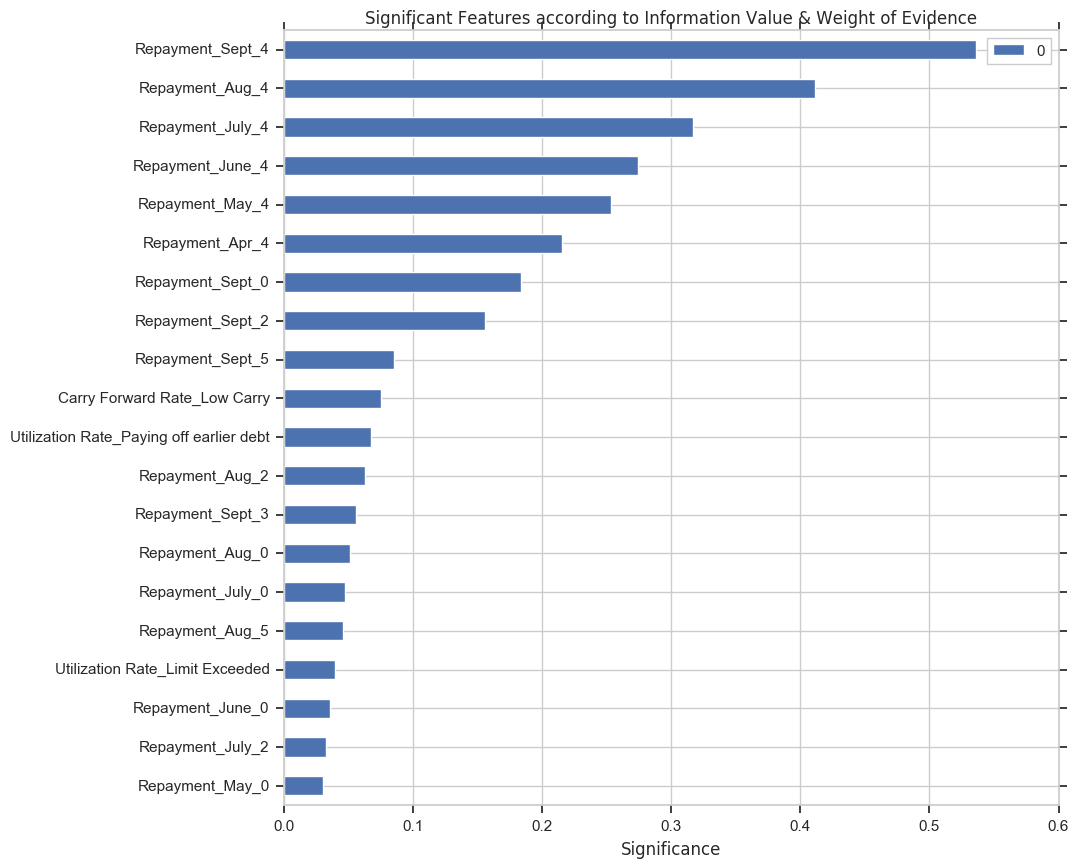

In [162]:
df_iv = pd.DataFrame({},index=[])
slect = []
import numpy as np

def IV(x,y="default.payment.next.month"):
    col1 = df_new[x]
    col2 = df_new[y]
    cont = pd.crosstab(col1,col2,margins = True)
    for i in list(col1.unique()):
        DG =(np.array(cont.loc[[i],[0]]))/(np.array(cont[-1:][0]))
        DB =(np.array(cont.loc[[i],[1]]))/(np.array(cont[-1:][1]))
        z= float((DG-DB)*(np.log(DG/DB)))
        if z>=0.03 and z<0.6:
             df_iv["{0}_{1}".format(x,i)] = [z]
    
       
testcolumns1 = ["Repayment_Sept","Repayment_Aug","Repayment_July","Repayment_June","Repayment_May","Repayment_Apr","SEX","EDUCATION","MARRIAGE","age_f","Utilization Rate","Carry Forward Rate"]
for var in testcolumns1:
    IV(var)
# Dataframe containing Information values for each factor and for each categorical level    
df_iv.transpose().sort_values(0).plot(kind="barh",figsize=(10,10))
plt.xlabel("Significance")
plt.title("Significant Features according to Information Value & Weight of Evidence")
plt.show()


# We know that:-
#Information value           Outcome
#   <0,02                   Useless for prediction
#   0.02 to 0.1             Weak predictor
#   0.1 to 0.3              Medium predictor
#   0.3 to 0.5              Strong predictor
#   >0.5                    Suspicious or too good to be true

# Based on above criteria Results :-
#Repayment_Sept - Weak Predictor
#Repayment_Aug - Useless for prediction
#Repayment_July - Useless for prediction
#Repayment_May - Useless for prediction

In [241]:
# Using categorical variables found strong using Information value
df2 = pd.get_dummies(df_new["Repayment_Sept"]).loc[:,[0,2,3,4,5]]
df3 = pd.get_dummies(df_new["Repayment_Aug"]).loc[:,[0,2,4,5]]
df4 = pd.get_dummies(df_new["Repayment_July"]).loc[:,[0,2,4]]
df5 = pd.get_dummies(df_new["Repayment_June"]).loc[:,[0,4]]
df6 = pd.get_dummies(df_new["Repayment_May"]).loc[:,[0,4]]
df7 = pd.get_dummies(df_new["Repayment_Apr"]).loc[:,[4]]
df8 = pd.get_dummies(df_new["Utilization Rate"]).iloc[:,[1,4]]
df9 = pd.get_dummies(df_new["Carry Forward Rate"]).iloc[:,1]

In [242]:
# Renaming the columns and combining the datasets
df2.rename(columns={0:'No Consumption_sept',2 : 'Sept no delay', 3 :  'Sept delay-1 months', 4 : 'Sept delay-2 months', 5 : 'Sept delay-3 months'}, inplace=True)
df3.rename(columns={0:'No Consumption_aug', 2 : 'Aug delay-no_delay', 4 : 'Aug delay-2 months', 5 : 'Aug delay-3 months'}, inplace=True)
df4.rename(columns={0:'No Consumption_jul', 2: 'July No_delay', 4 : 'July delay-2 months'}, inplace=True)
df5.rename(columns={0:'No Consumption_jun',4 : 'June delay-2 months'}, inplace=True)
df6.rename(columns={0:'No Consumption_may', 4 : 'May delay-2 months'}, inplace=True)
df7.rename(columns={ 4 : 'Apr delay-2 months'}, inplace=True)
df_cat = pd.concat([df2,df3,df4,df5,df6,df7,df8,df9],axis=1,sort= False)

In [232]:
# Selected numeric variables
# For Bill amount using only Bill_amnt_aug
df_num = df_new.iloc[:,[1,13,18,19,20,21,22,23]]

In [229]:
# Standardizing the numeric variables
from sklearn import preprocessing
names = df_num.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [233]:
# Dependent variable Exploration
# 20 Events per observation rule - for each variable there must be atleast 20 observations
df_new["default.payment.next.month"].value_counts()# 28.4% default rate
EPO = 6636/23 # We have approximately 288 observations per variable 

In [234]:
df10 = pd.get_dummies(df_new,columns=['SEX','EDUCATION','MARRIAGE','Repayment_Sept', 'Repayment_Aug', 'Repayment_July', 'Repayment_June','Repayment_May', 'Repayment_Apr','age_f','Utilization Rate','Carry Forward Rate'])

In [235]:
df10.drop(['ID','LIMIT_BAL','AGE','Bill_Statement_Sept','Bill_Statement_Aug',
           'Bill_Statement_Jul', 'Bill_Statement_June', 'Bill_Statement_May',
           'Bill_Statement_Apr', 'Previous_Payment_Sept', 'Previous_payment_Aug',
           'Previous_payment_July', 'Previous_payment_June',
           'Previous_payment_May', 'Previous_payment_Apr',
           'default.payment.next.month'],axis=1,inplace=True)

In [422]:
#Creating three test train splits 
#1. Containing dummy variables for all columns for rfe of random forest
#2. Columns selected through information value and few numeric variables
#3. Only categorical variables
X_train1.columns

Index(['LIMIT_BAL', 'Bill_Statement_Aug', 'Previous_Payment_Sept',
       'Previous_payment_Aug', 'Previous_payment_July',
       'Previous_payment_June', 'Previous_payment_May', 'Previous_payment_Apr',
       'No Consumption_sept', 'Sept no delay', 'Sept delay-1 months',
       'Sept delay-2 months', 'Sept delay-3 months', 'No Consumption_aug',
       'Aug delay-no_delay', 'Aug delay-2 months', 'Aug delay-3 months',
       'No Consumption_jul', 'July No_delay', 'July delay-2 months',
       'No Consumption_jun', 'June delay-2 months', 'No Consumption_may',
       'May delay-2 months', 'Apr delay-2 months', 'Limit Exceeded',
       'Paying off earlier debt', 'Low Carry'],
      dtype='object')

In [244]:
# Data containing columns selected through information value and few numeric variables
from sklearn.model_selection import train_test_split
data1 = pd.concat([scaled_df,df_cat],axis=1,sort=False)
y = df_new["default.payment.next.month"]
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(data1,y,random_state=42,test_size = 0.3,shuffle= True,stratify=y)

In [237]:
# Data containing  dummy variables for all columns for rfe and random forest
data2 = pd.concat([scaled_df,df10],axis=1,sort=False)
y = df_new["default.payment.next.month"]
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(data2,y,random_state=42,test_size = 0.3,shuffle= True,stratify=y)

In [238]:
# Data containing only categorical variables
from sklearn.model_selection import train_test_split
y = df_new["default.payment.next.month"]
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(df10,y,random_state=42,test_size = 0.3,shuffle= True,stratify=y)

In [395]:
#Functions
# Function for GridsearchCV
from sklearn.model_selection import GridSearchCV
# Can mark intersection point using shapely https://stackoverflow.com/questions/57728338/how-to-find-instersection-points-of-multiple-lines-in-matplolib-plot
def gridsearch(model,params,X_train,Y_train,X_test,Y_test,k):
    n_fold = 5
    gs = GridSearchCV(model,params,scoring='roc_auc',cv=n_fold,verbose=1)
    gs.fit(X_train,Y_train)
    print('Best params: ', gs.best_params_)
    print('Best auc on training set: ', gs.best_score_)
    print('Best auc on test set: ', gs.score(X_test, Y_test))
    if k == 1:
        return gs.predict(X_test), gs.decision_function(X_test)
    elif k==2:
        return gs.predict(X_test)

# Function for getting confusion matrix
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
def plot_confusion(prediction,Y_test):
    conmat = np.array(confusion_matrix(Y_test, prediction,labels=[1,0]))
    confusion = pd.DataFrame(conmat,index=['not default','default'], columns=['predicted not default','predicted default'])
    sns.heatmap(conmat)
    plt.show()
    print(confusion)

# Function for plotting roc curve 
def plot_roc(prob,Y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(Y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])

    plt.figure(figsize=[9,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.3f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('false positive rate', fontsize=18)
    plt.ylabel('true positive rate', fontsize=18)
    plt.title('ROC curve for credit default', fontsize=18)
    plt.legend(loc='lower right')
    plt.show()
    
def cutoff(logit_pred,lower,upper,Y_test):
    acc=[]
    sens = []
    spec =[]
    cutoff =[] 
    for i in range(0,50):
        pred = [1 if x>=lower else 0 for x in logit_pred]
        conmat = np.array(confusion_matrix(Y_test, pred,labels=[1,0]))
        acc.append((conmat[0,0]+conmat[1,1])/np.sum(conmat))
        sens.append(conmat[1,1]/(conmat[1,0]+conmat[1,1]))
        spec.append(conmat[0,0]/(conmat[0,0]+conmat[0,1]))
        cutoff.append(lower)
        lower= lower +0.01
    combine = pd.DataFrame({'Cutoff':cutoff,'Accuracy':acc,'Sensitivity':sens,'Specificity':spec})
    #print(combine)
    plt.figure(figsize=(40,20))
    ax = plt.gca()
    combine.plot(x='Cutoff',y='Accuracy',kind='line',linewidth = 4.0,ax=ax)
    combine.plot(x='Cutoff',y='Sensitivity',kind='line',color='red',linewidth = 4.0,ax=ax)
    combine.plot(x='Cutoff',y='Specificity',kind='line',color='green',linewidth = 4.0,ax=ax)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.xlabel("Cutoff",fontsize=30)
    plt.legend(fontsize=30)
    plt.show()

In [247]:
# Model Development
# Logistic Regression Model using variables provided by information value and few numeric variables
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
X2 = sm.add_constant(X_train1)
y = df["default.payment.next.month"]
logit_mod = sm.Logit(Y_train1,X2)
logit_mod2 =logit_mod.fit()
print(logit_mod2.summary())

C:\Users\mehul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.420516
         Iterations 8
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                19814
Model:                                  Logit   Df Residuals:                    19785
Method:                                   MLE   Df Model:                           28
Date:                        Tue, 08 Oct 2019   Pseudo R-squ.:                  0.1965
Time:                                00:27:52   Log-Likelihood:                -8332.1
converged:                               True   LL-Null:                       -10370.
                                                LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const             

In [254]:
# Dropping Previous_payment_July,Previous_payment_June,Previous_payment_May,Aug delay-no_delay,Aug delay-2 months as they have lower significance
X_train_1 = X_train1.drop(['Previous_payment_July','Previous_payment_June','Previous_payment_May','No Consumption_aug','Aug delay-no_delay',
                         'Aug delay-2 months','Aug delay-3 months','No Consumption_jul','July delay-2 months','No Consumption_jun',
                         'July delay-2 months','No Consumption_may','Limit Exceeded','Low Carry'],axis=1)
X_test_1 = X_test1.drop(['Previous_payment_July','Previous_payment_June','Previous_payment_May','No Consumption_aug','Aug delay-no_delay',
                         'Aug delay-2 months','Aug delay-3 months','No Consumption_jul','July delay-2 months','No Consumption_jun',
                         'July delay-2 months','No Consumption_may','Limit Exceeded','Low Carry'],axis=1)

In [286]:
params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
mod = LogisticRegression(solver='liblinear')
mod.fit(X_train_1,Y_train1)
lr_pred,lr_prob = gridsearch(mod,params,X_train_1,Y_train1,X_test_1,Y_test1,1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best params:  {'class_weight': 'balanced', 'C': 10, 'penalty': 'l1'}
Best auc on training set:  0.7875367735083624
Best auc on test set:  0.79058976011755


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.3s finished


In [287]:
# Logistic Model on the hyperparameters selected through Gridsearch
logit_final = LogisticRegression(C = 10, class_weight = None, penalty = 'l1',solver='liblinear')
logit_final.fit(X_train_1,Y_train1)
logit_pred = logit_final.predict(X_test_1)
logit_prob = logit_final.decision_function(X_test_1)
logit_prob1 = logit_final.predict_proba(X_test_1)[:,1]
print('Test score: ', logit_final.score(X_test_1, Y_test1))

Test score:  0.824658502119642


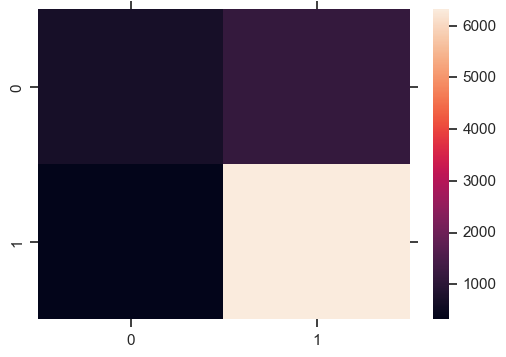

             predicted not default  predicted default
not default                    681               1164
default                        325               6322


In [288]:
# Confusion Matrix
plot_confusion(logit_pred,Y_test1) 

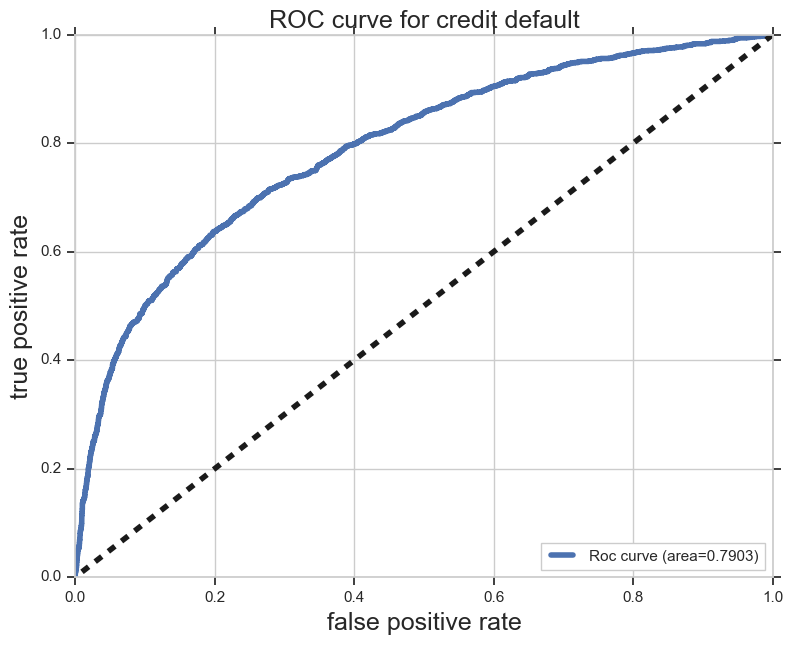

In [308]:
#ROC Curve
plot_roc(logit_prob,Y_test1)

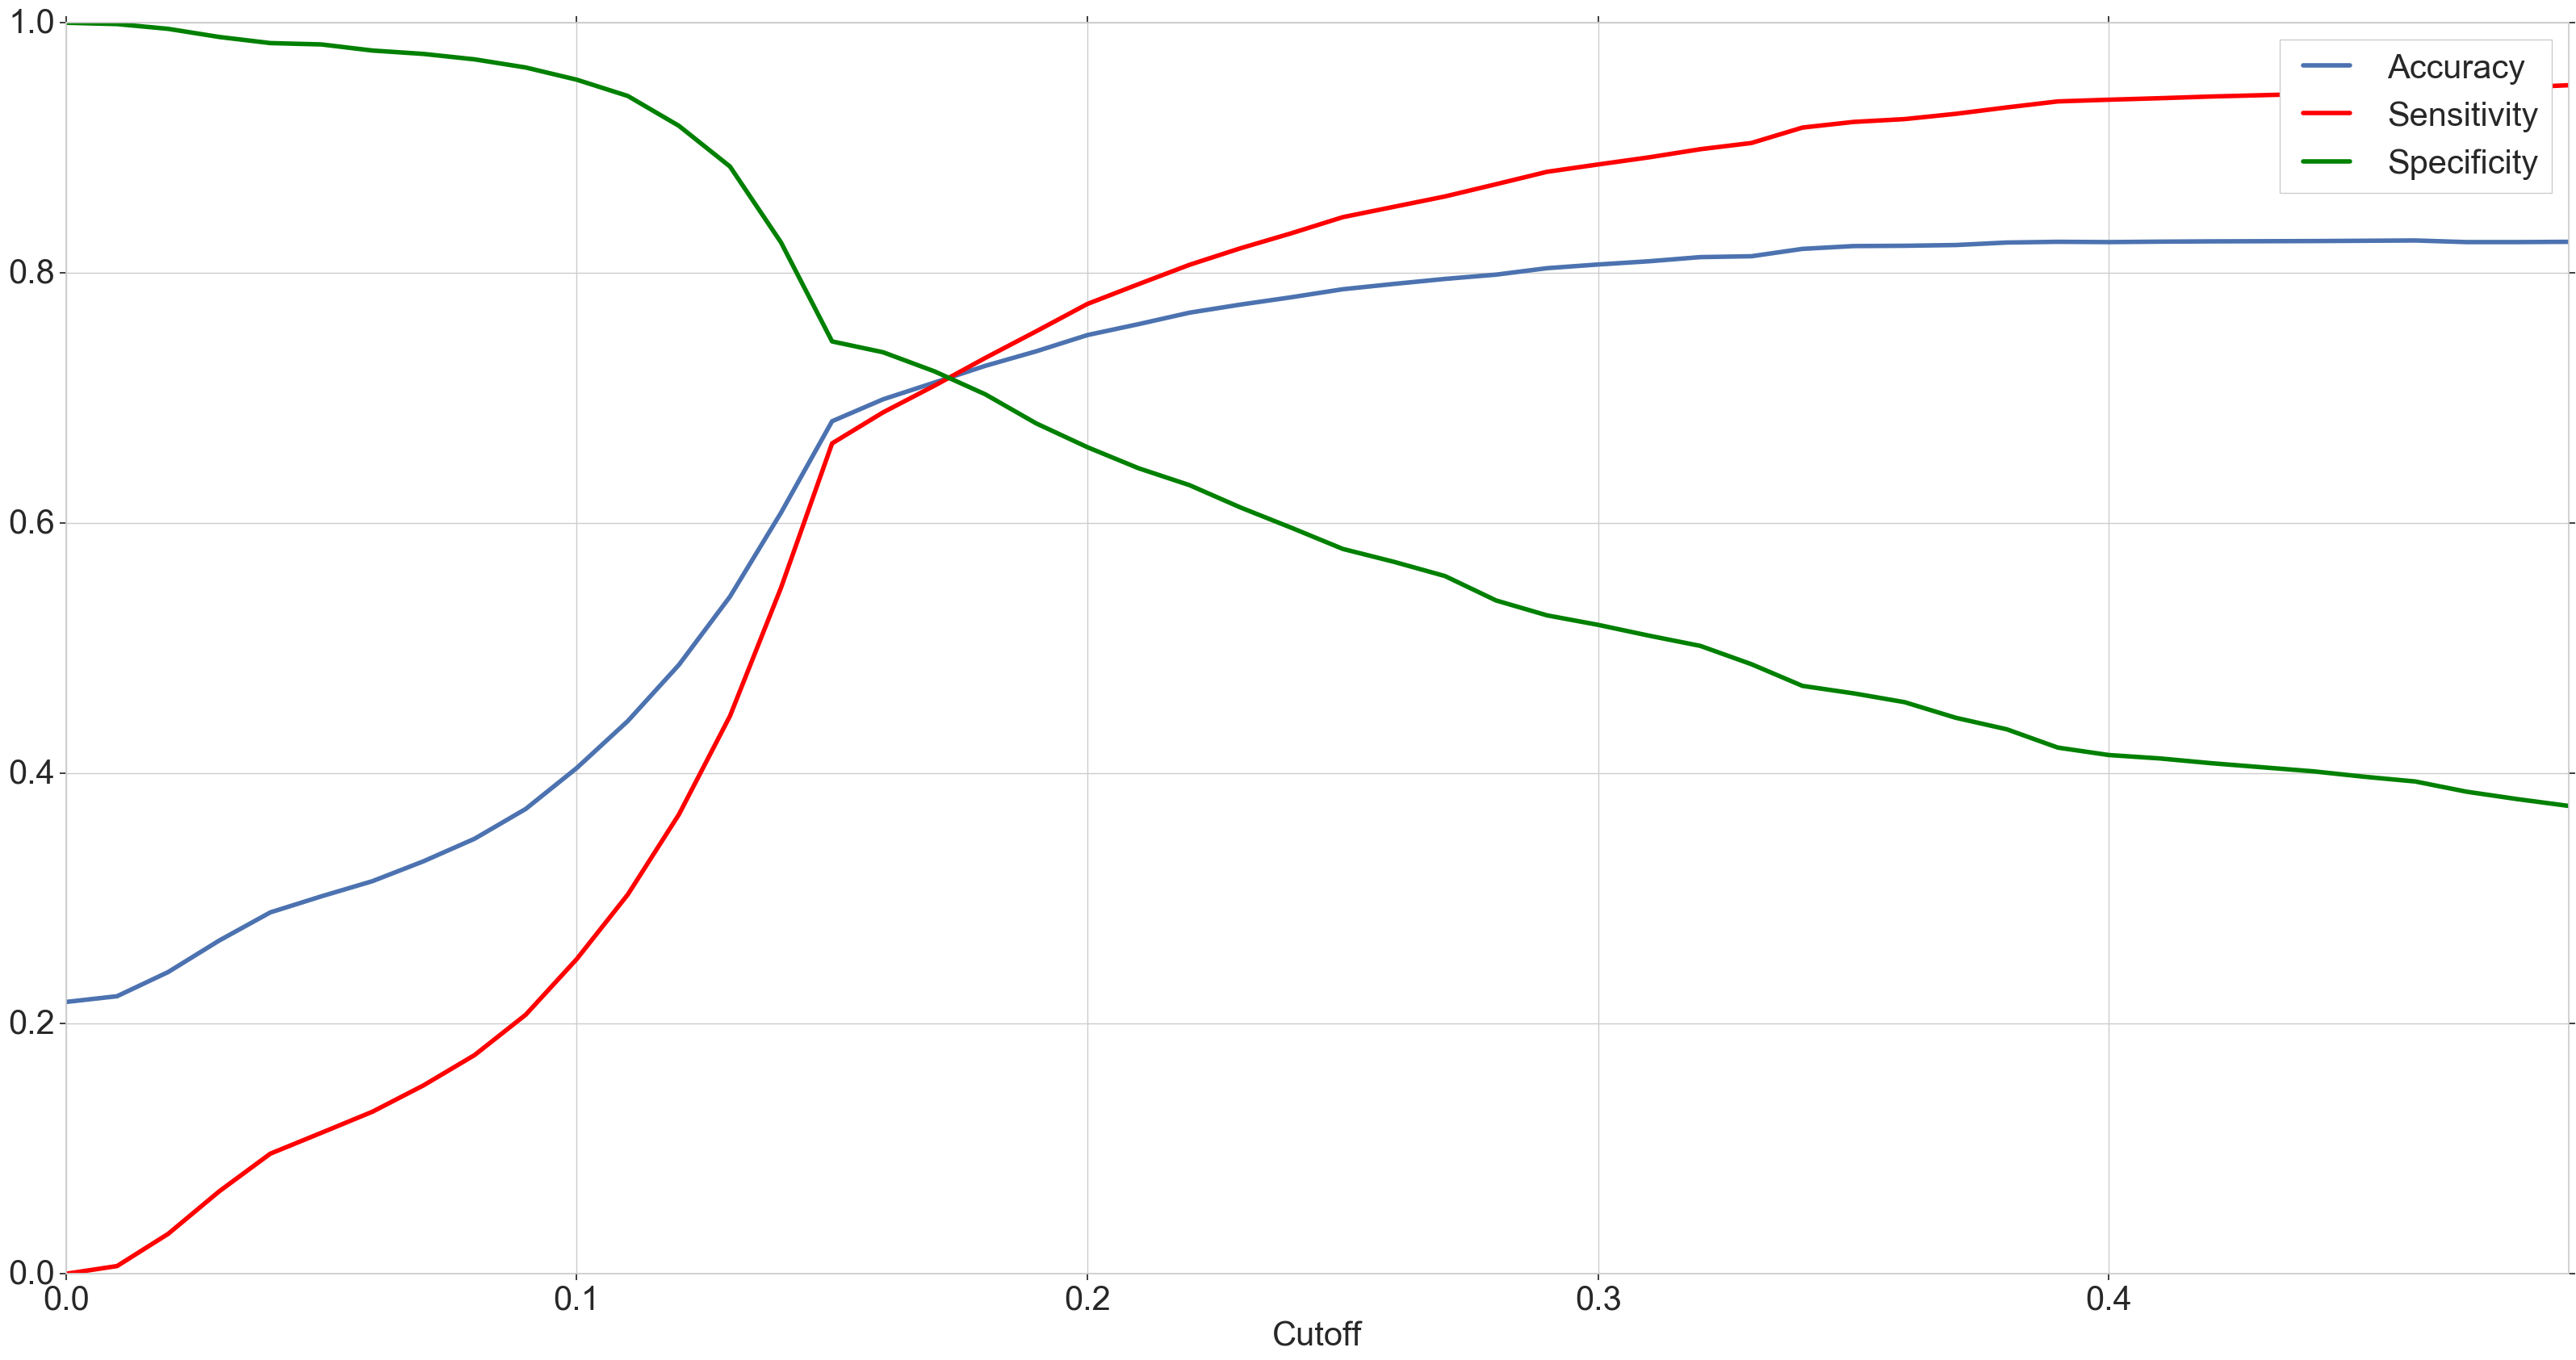

In [338]:
cutoff(logit_prob1,0,0.5,Y_test)

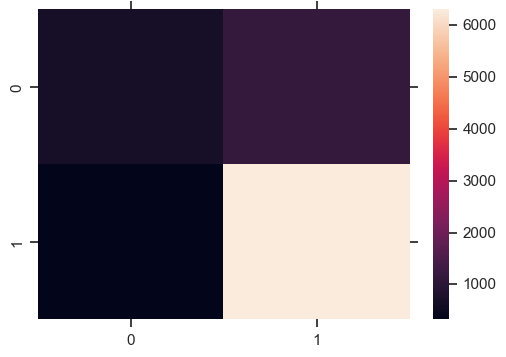

             predicted not default  predicted default
not default                    690               1155
default                        332               6315


In [290]:
#Cutoff 0.18
pred_logit_final1 = [1 if x>=0.49 else 0 for x in logit_prob1]
plot_confusion(pred_logit_final1,Y_test1)

In [ ]:
# Now using another approach, we will use all the dummy variables & we will use dimentionality reduction theorems in order 
#to determine the important variables.In risk analytics we cannot take a method where we cannot know 
#what variables are actually used by the model. Following dimentionality reduction techniques will be used:-
# Random Forest for variable importance - random forest builds model according to variable importance
# Recursive Feature Elimination
# Principal component analysis # Not preffered in Risk Analytics
# Linear Discriminant Analysis
# Generalised Discriminant Analysis

In [266]:
# Method1- Random Forest for feature selection
# Random forest comes with in -built feature importance
# Need to convert data into numeric form as Random Forest takes only numeric data

from sklearn.ensemble import RandomForestRegressor
mod_forest = RandomForestRegressor(random_state=1,max_depth=10)
mod_forest.fit(X_train2,Y_train2)

C:\Users\mehul\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

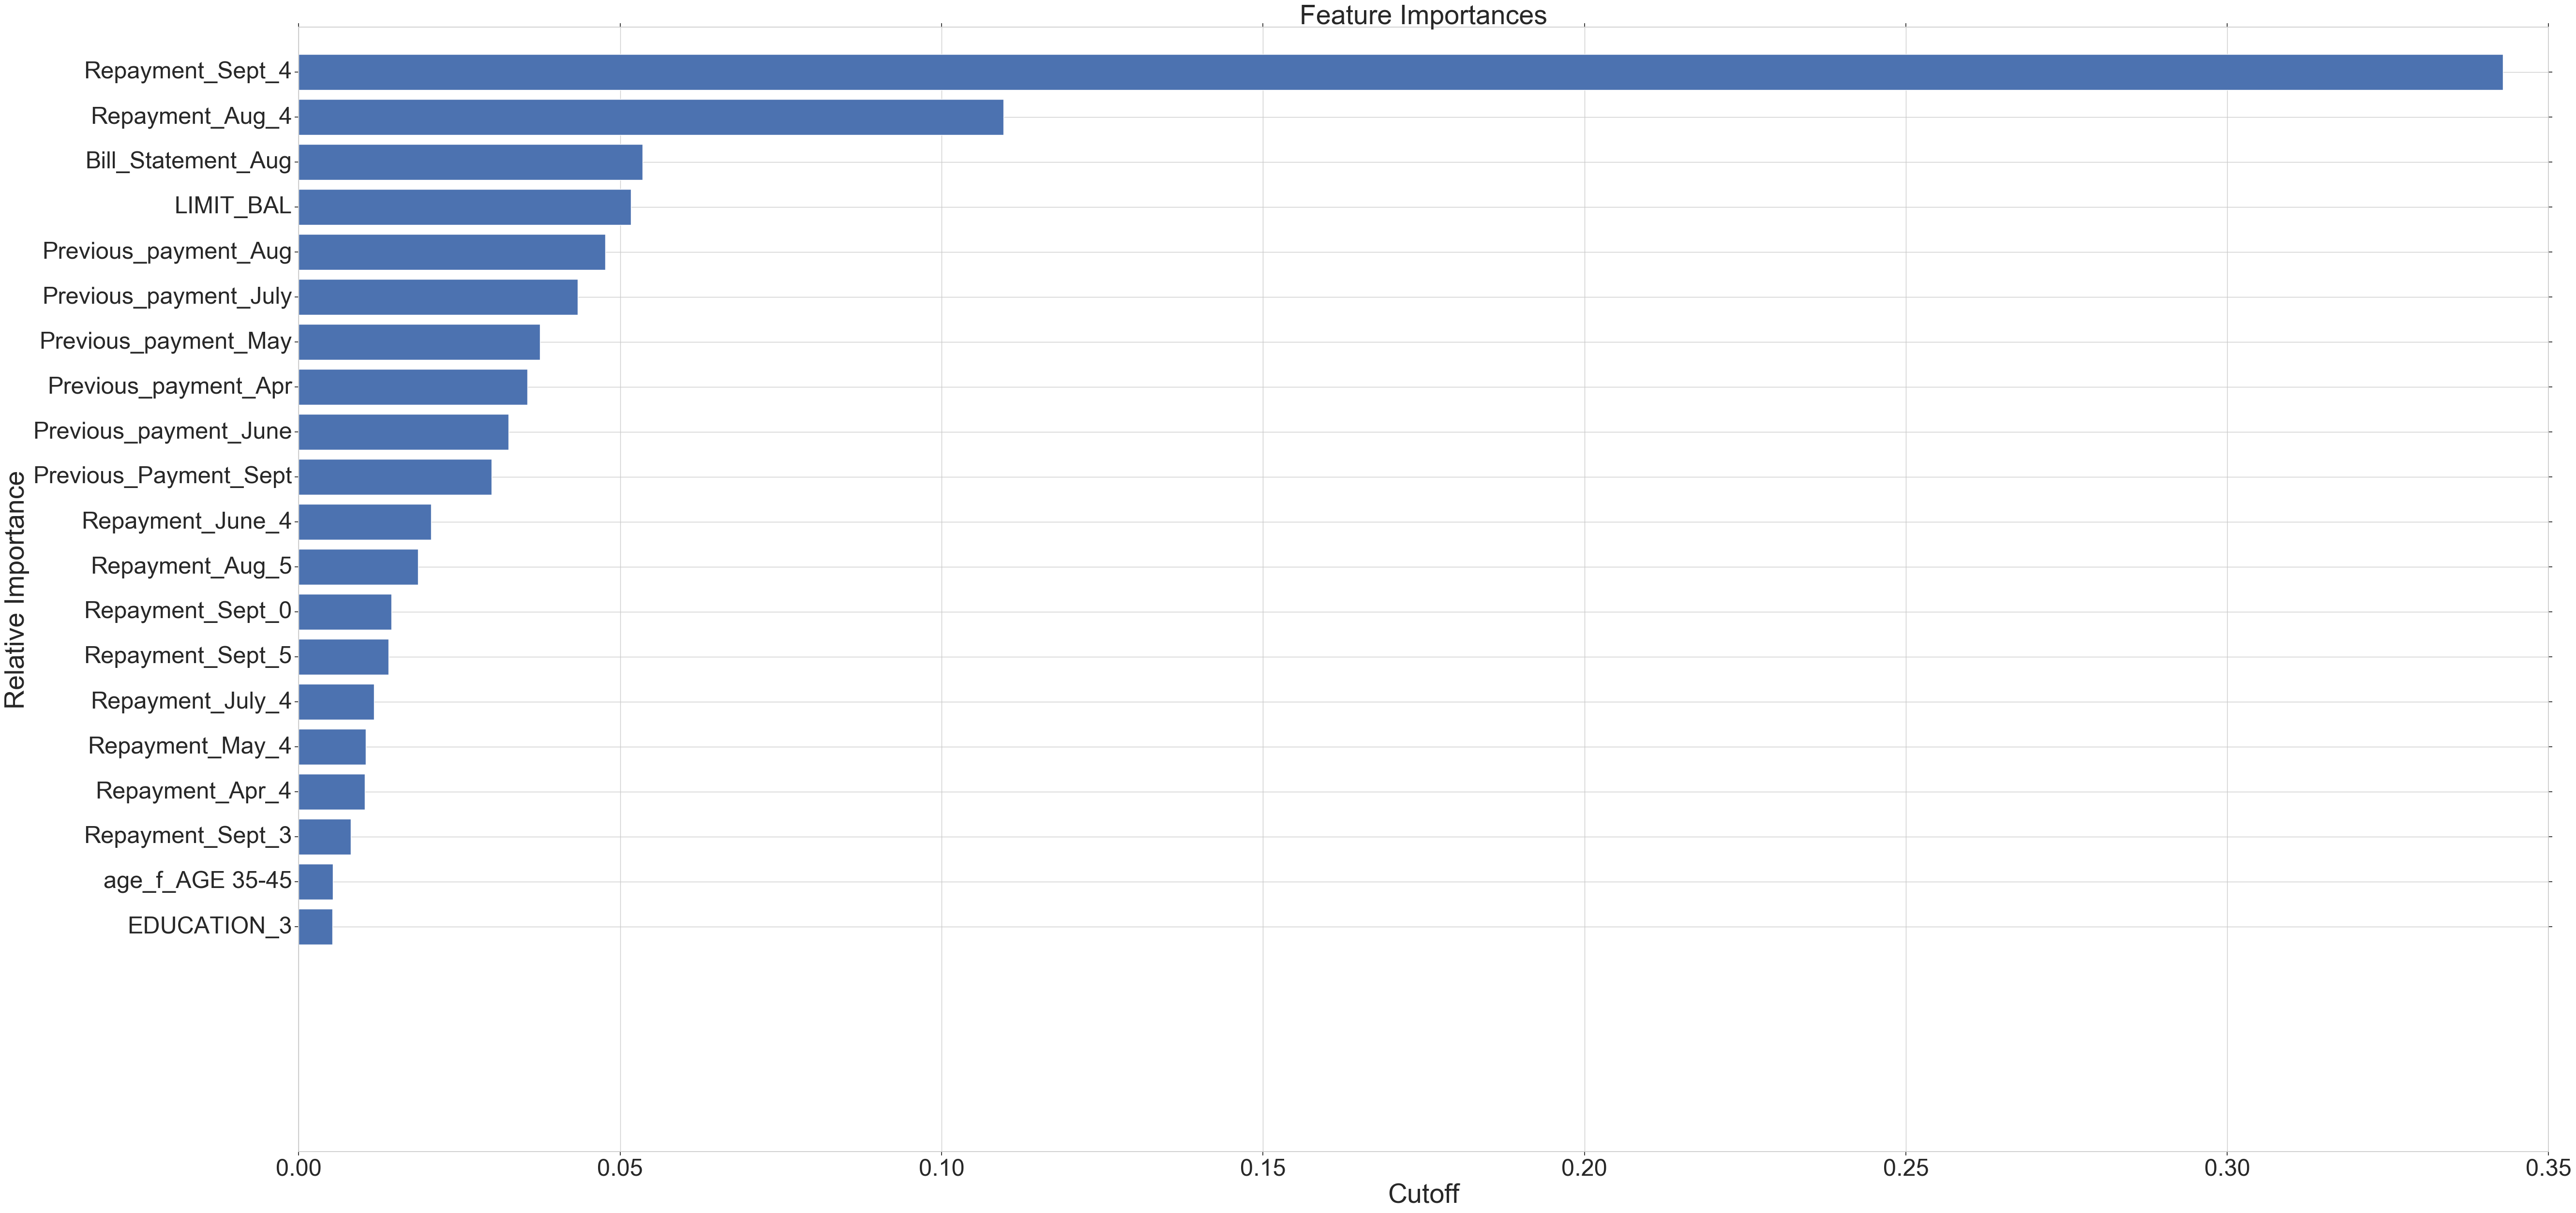

In [299]:
# Plotting feature importance plot
features = data2.columns
importances = mod_forest.feature_importances_
indices = np.argsort(importances)[-20:]  # top 20 features
plt.figure(figsize=(60,30))
plt.title('Feature Importances',fontsize=40)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.ylabel('Relative Importance',fontsize=40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.xlabel("Cutoff",fontsize=40)
plt.show()

In [301]:
# Deciding No. of features to take by recursively building logistic regression model and calculating AUC
# We found that the best AUC is achieved for top 18 features
df_rf = pd.DataFrame({},index=[])
print("No. of features--------------------AUC")
for i in range(len(indices)):
    df_rf = pd.concat([df_rf,data2.iloc[:,indices[19-i]]],axis=1,sort= False)
    y = df_new["default.payment.next.month"]
    X_train4,X_test4,Y_train4,Y_test4 = train_test_split(df_rf,y,random_state=42,test_size = 0.3,shuffle= True,stratify=y)
    mod_rf = LogisticRegression(solver='liblinear')
    mod_rf.fit(X_train4,Y_train4)
    mod_rf_prob = mod_rf.decision_function(X_test4)
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(Y_test4, mod_rf_prob)
    roc_auc[1] = auc(fpr[1], tpr[1])
    print('{0}-----------------------------{1}'.format(i+1,roc_auc[1]))

No. of features--------------------AUC
1-----------------------------0.6301707924556303
2-----------------------------0.6895376319492095
3-----------------------------0.7119427106712769
4-----------------------------0.7507585181162478
5-----------------------------0.7580241386888067
6-----------------------------0.7588171691856831
7-----------------------------0.7590984053363927
8-----------------------------0.7586273001288761
9-----------------------------0.758392501782698
10-----------------------------0.7598555168641803
11-----------------------------0.7686455939329966
12-----------------------------0.7713728262602318
13-----------------------------0.7791866901668867
14-----------------------------0.7804072827850289
15-----------------------------0.7817332268403172
16-----------------------------0.7837674391487408
17-----------------------------0.7847526218605048
18-----------------------------0.787527800507432
19-----------------------------0.7874577157084945
20--------------------

In [ ]:
# Making Logistic Regression Model only on the top 18 Important variables through Random Variable Variable selection
# Creating new dataset using variables selected through randm forest variable selection
X_train4.drop(['age_f_AGE 35-45', 'EDUCATION_3'],axis=1,inplace=True)
X_test4.drop(['age_f_AGE 35-45', 'EDUCATION_3'],axis=1,inplace=True)

In [312]:
# Building logistic Regression model on variables selected by random forest
params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
mod_rf_18 = LogisticRegression(solver='liblinear')
lr_pred_rf,lr_prob_rf = gridsearch(mod_rf_18,params,X_train4,Y_train4,X_test4,Y_test4,1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.7s finished


Best params:  {'class_weight': 'balanced', 'C': 1, 'penalty': 'l2'}
Best auc on training set:  0.7818249641971062
Best auc on test set:  0.7873712410961932


In [317]:
mod_rf_18 = LogisticRegression(class_weight = 'balanced', C = 1, penalty= 'l2',solver='liblinear')
mod_rf_18.fit(X_train4,Y_train4)
pred_rf_18 = mod_rf_18.predict(X_test4)
pred_rf_prob_18 = mod_rf_18.predict_proba(X_test4)[:,1]
rf_prob_18 = mod_rf_18.decision_function(X_test4)
print('Test score: ', mod_rf.score(X_test4, Y_test4))

Test score:  0.8234809232218558


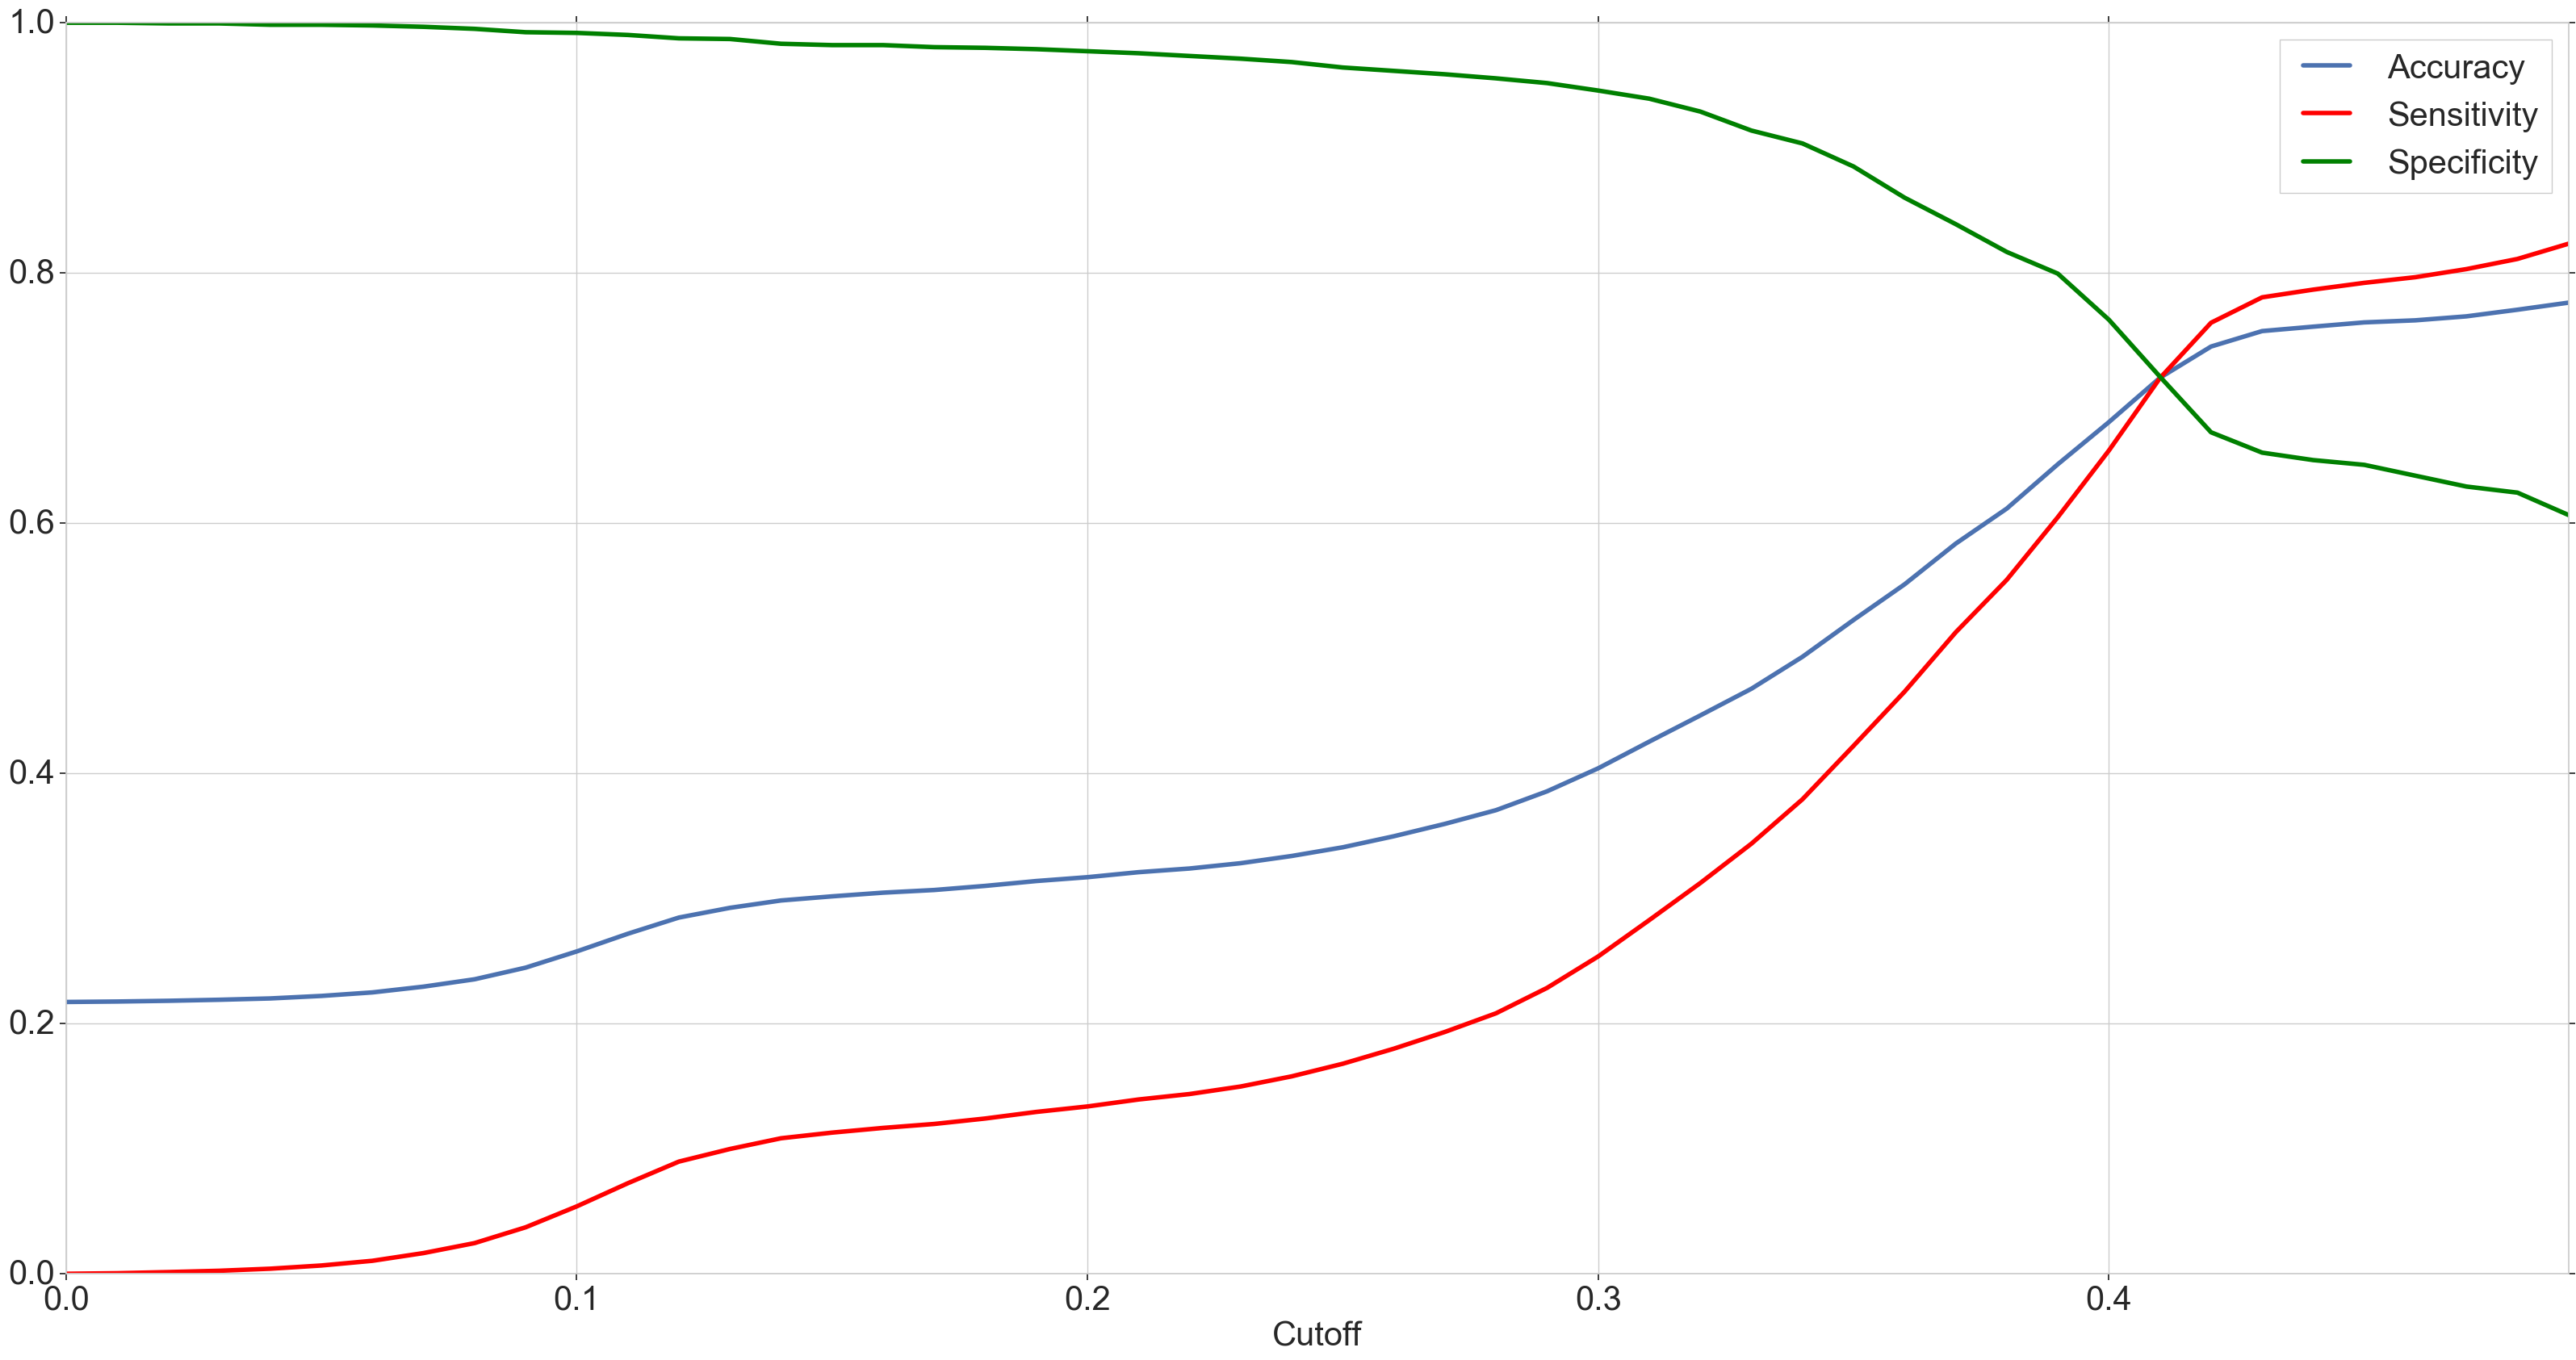

In [318]:
# Calculating better cutoff
cutoff(pred_rf_prob_18,0,0.5,Y_test4)

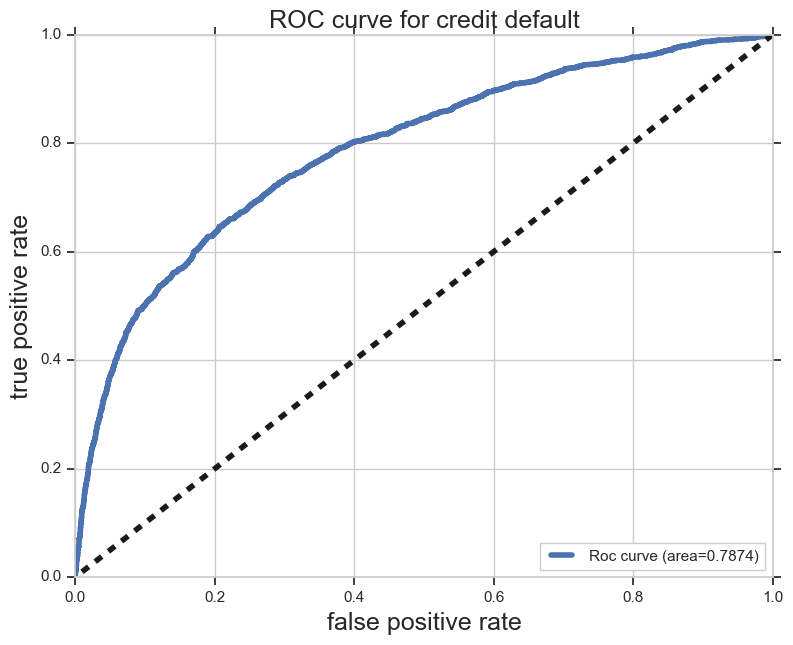

In [315]:
#Plotting ROC
plot_roc(rf_prob_18,Y_test4)

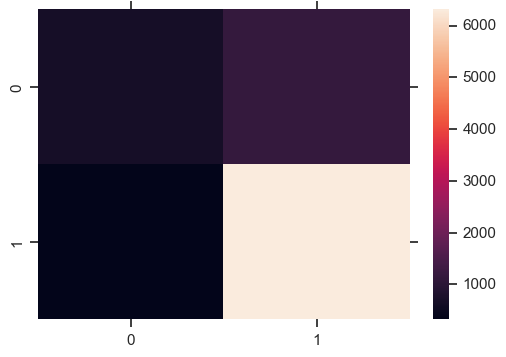

             predicted not default  predicted default
not default                    676               1169
default                        330               6317


In [311]:
# Plotting Confusion matrix
plot_confusion(pred_rf_18,Y_test4)

In [323]:
# Using Recursive Feature Elimination to select model 
# RFE builds model recursively and returns the column having higher importance

from sklearn.feature_selection import RFECV
mod_rfe = LogisticRegression(class_weight = 'balanced', C = 1, penalty='l2',solver='liblinear')
rfecv = RFECV(estimator=mod_rfe, scoring='roc_auc')
model = rfecv.fit(X_train2, Y_train2)
rfe_pred = model.predict(X_test2)
rfe_prob = model.decision_function(X_test2)
rfe_prob1 = model.predict_proba(X_test2)[:,1]
print('Test score: ', model.score(X_test2, Y_test2))

C:\Users\mehul\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Test score:  0.7780263777673104


In [332]:
#print summaries for the selection of attributes
selected_columns =rfecv.support_
Column_ranking = rfecv.ranking_
df_col = pd.DataFrame({'Variable':list(X_train2.columns),'Importance':selected_columns,'Column_ranking':Column_ranking })
df_col.sort_values(['Column_ranking'],ascending=True).head(20)

Column_ranking  Importance                           Variable
0                1        True                          LIMIT_BAL
63               1        True                    Repayment_May_2
62               1        True                    Repayment_May_1
61               1        True                    Repayment_May_0
60               1        True                  Repayment_June_10
59               1        True                   Repayment_June_9
57               1        True                   Repayment_June_7
56               1        True                   Repayment_June_6
54               1        True                   Repayment_June_4
52               1        True                   Repayment_June_1
51               1        True                   Repayment_June_0
50               1        True                  Repayment_July_10
49               1        True                   Repayment_July_9
48               1        True                   Repayment_July_8
47               1        True                   Repayment_July_7
91               1        True  Carry Forward Rate_Moderate Carry
45               1        True                   Repayment_July_5
44               1        True                   Repayment_July_4
64               1        True                    Repayment_May_4
65               1        True                    Repayment_May_5

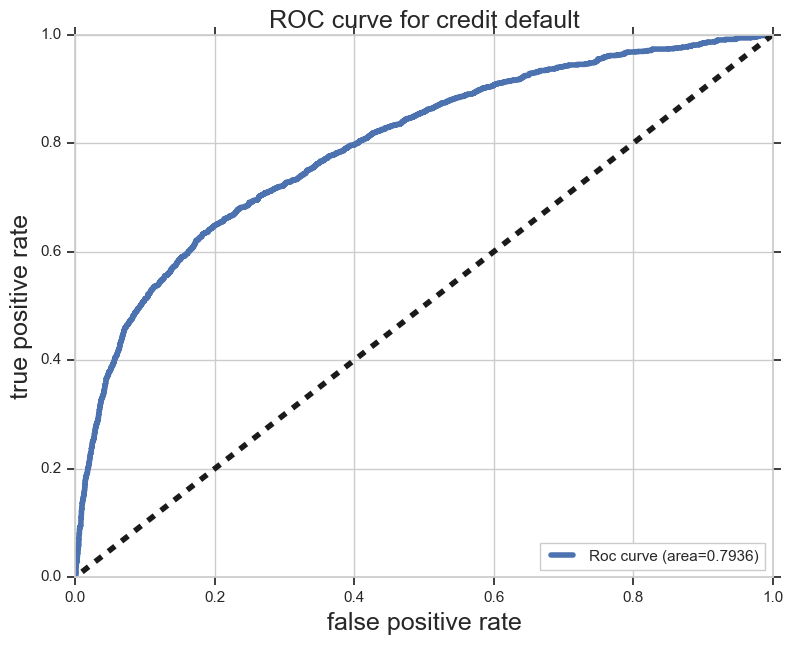

In [324]:
#Plotting ROC
plot_roc(rfe_prob1,Y_test4) # As you can see the Auc for model is 0.72

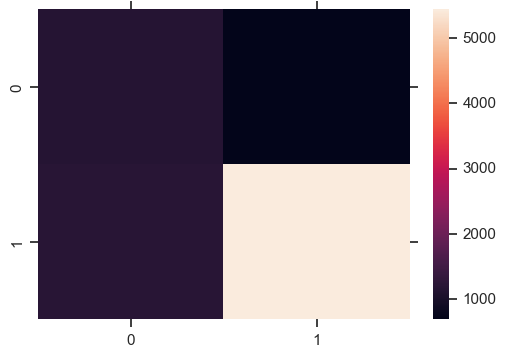

             predicted not default  predicted default
not default                   1158                687
default                       1198               5449


In [334]:
plot_confusion(rfe_pred,Y_test2)

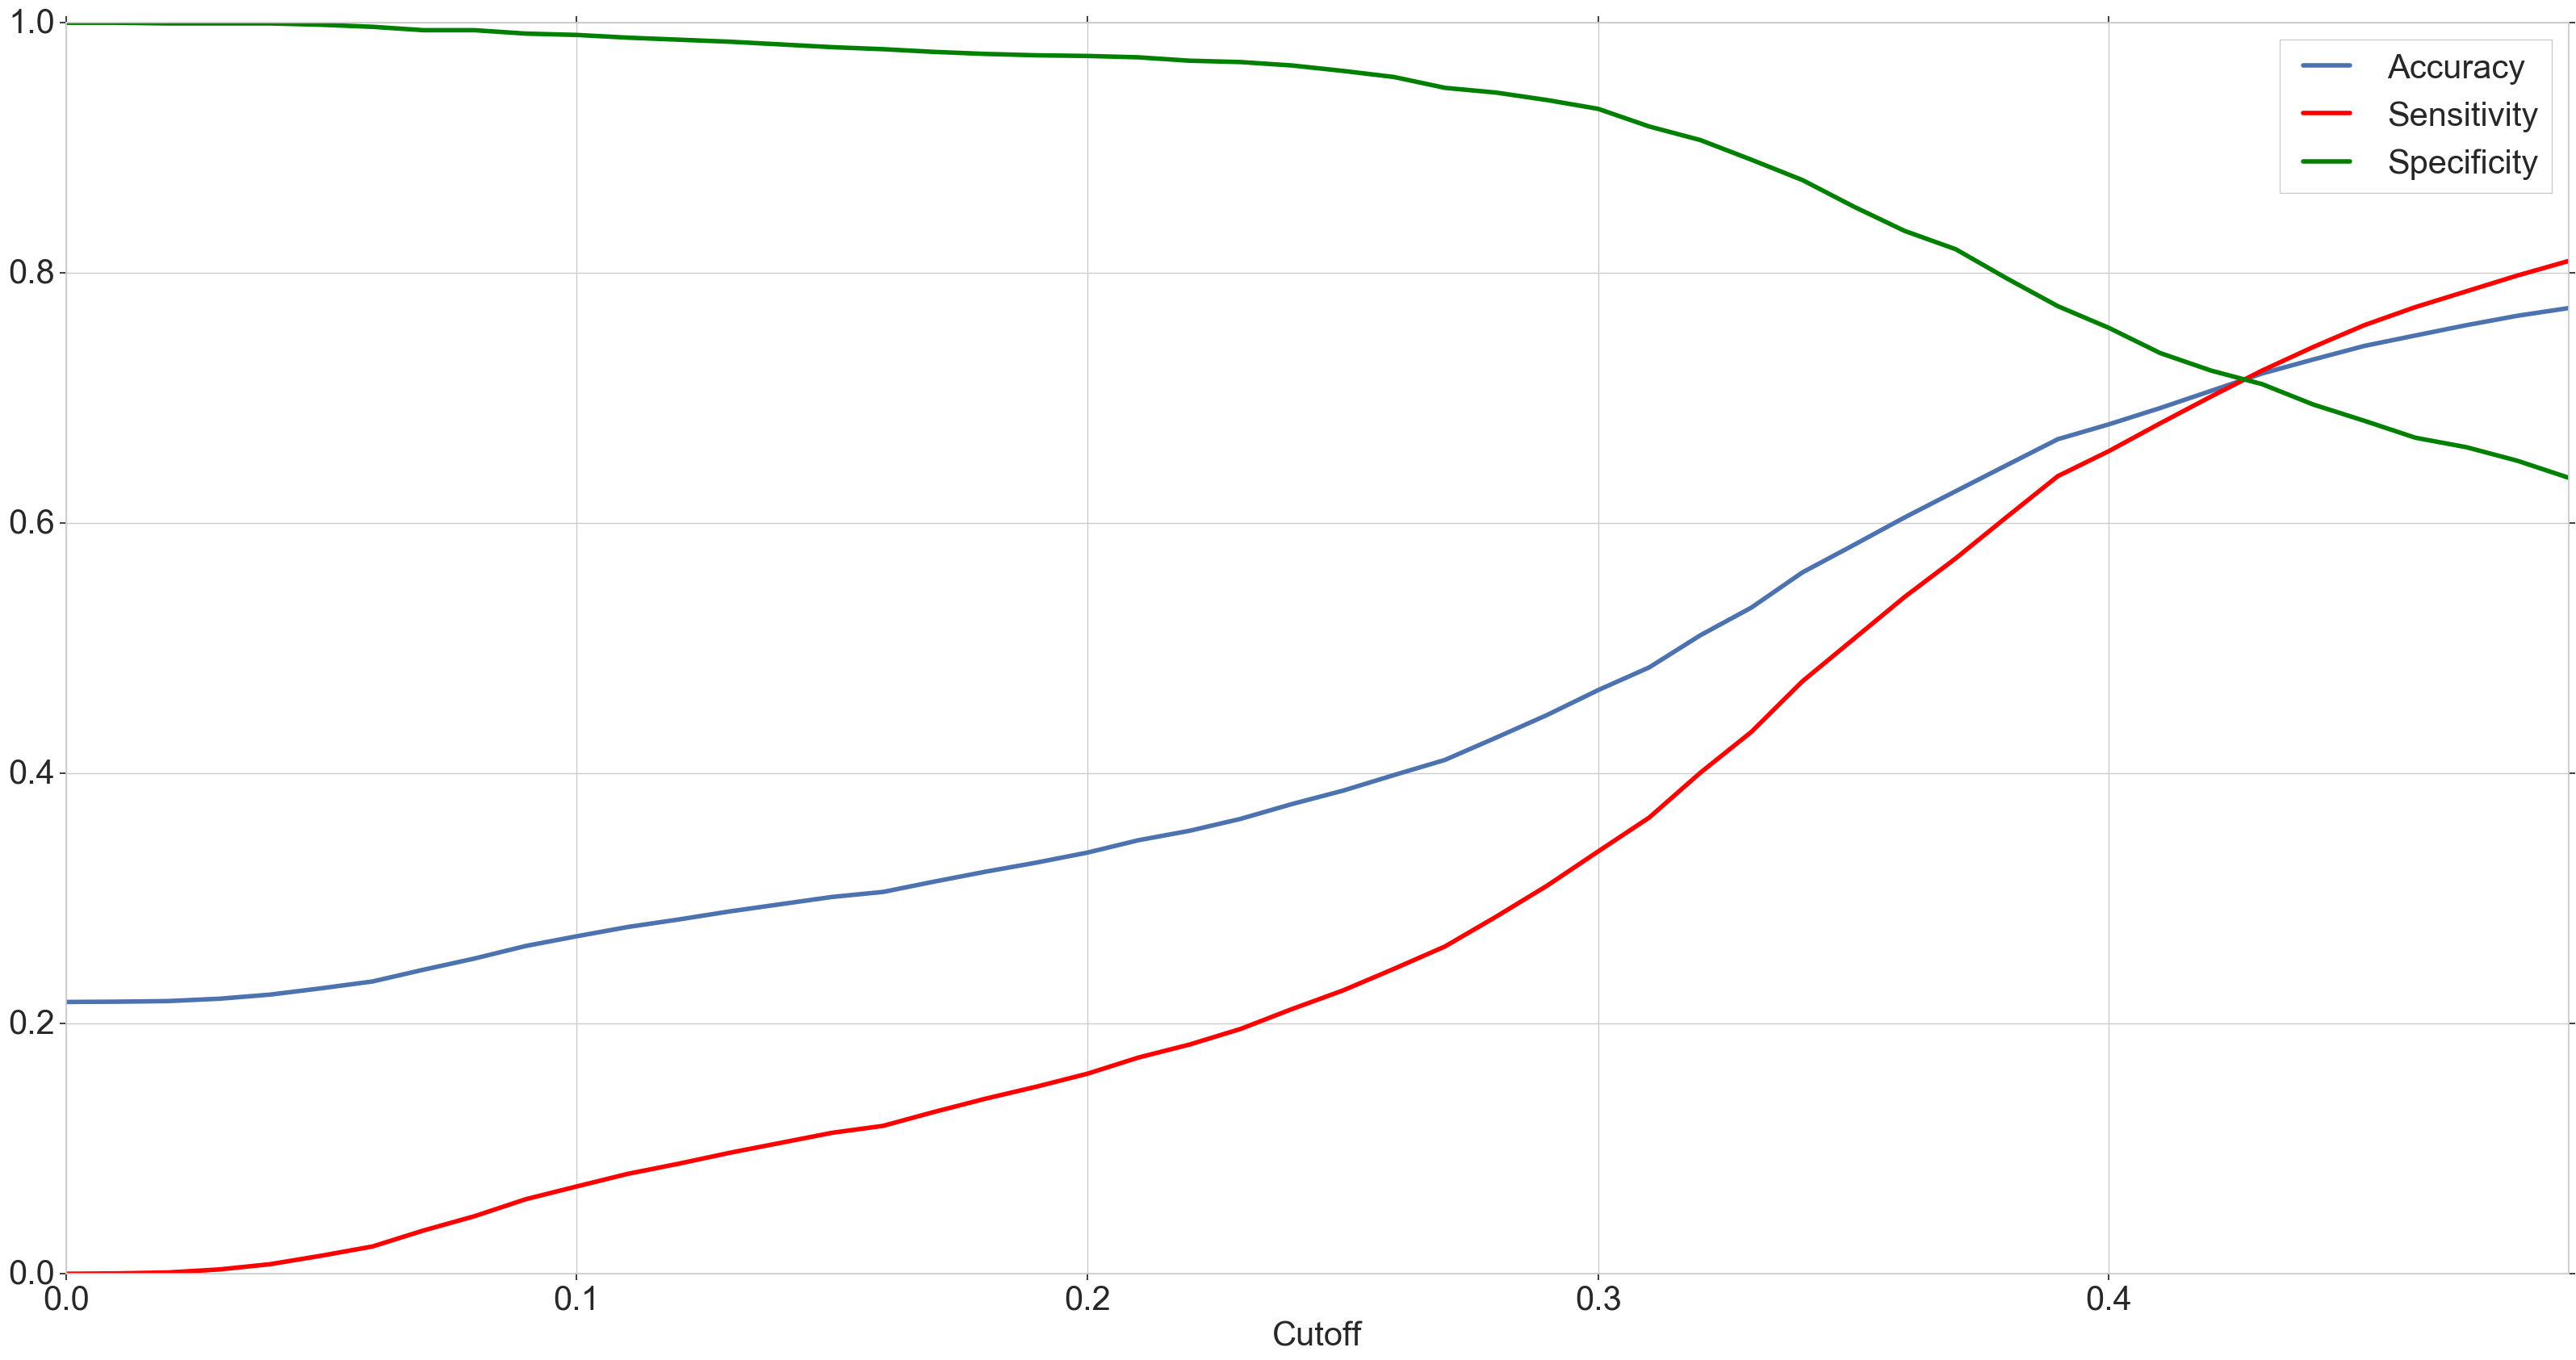

In [337]:
# Calculating better cutoff
cutoff(rfe_prob1,0,0.5,Y_test2)

In [339]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train2,Y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [352]:
# We will tune decision tree using Grid search. Hyperparameters we'll be tuning are:-
# max_depth- maximum depth of tree 
# minimum sample split - minimum number of samples required for splitting an internal node
# minimum sample leaf - minimum number of samples required at the leaf node
# max_features - maximum number of features/variables to be considered looking for best split
# criterion - gini, entropy -- criteria used for deciding the best split 


# To decrease computation time we'll be varying 2 parameters at a time
max_depth = range(1,10,1)
min_sample_split = np.linspace(0.2, 0.8, 10, endpoint=True)
min_sample_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1,X_train1.shape[1]))
criterion = ['gini','entropy']
params_dt = {'max_depth':max_depth,'min_samples_leaf':min_sample_leaf,'min_samples_split':min_sample_split}
dt_pred = gridsearch(dt,params_dt,X_train1,Y_train1,X_test1,Y_test1,2)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best params:  {'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'max_depth': 5}
Best auc on training set:  0.7209602017010709
Best auc on test set:  0.7263003094902319


[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed:  2.1min finished


In [353]:
params_dt2 = {'max_features':max_features,'criterion':criterion}
dt2 = DecisionTreeClassifier(min_samples_leaf= 0.1, min_samples_split= 0.2, max_depth= 5,random_state=0)
dt2.fit(X_train1,Y_train1)
dt_pred2= gridsearch(dt2,params_dt2,X_train1,Y_train1,X_test1,Y_test1,2)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best params:  {'criterion': 'entropy', 'max_features': 17}
Best auc on training set:  0.72563038544383
Best auc on test set:  0.733788578746326


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   17.8s finished


In [355]:
dt_final = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 0.1, min_samples_split = 0.2,criterion = 'entropy', max_features = 17,random_state=0)
dt_final.fit(X_train1,Y_train1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=17, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [357]:
# Making predictions using the tuned decision tree
dt_pred = dt_final.predict(X_test1)
dt_prob = dt_final.predict_proba(X_test1)[:,1]
print('Test score: ', dt_final.score(X_test1, Y_test1))

Test score:  0.799576071596797


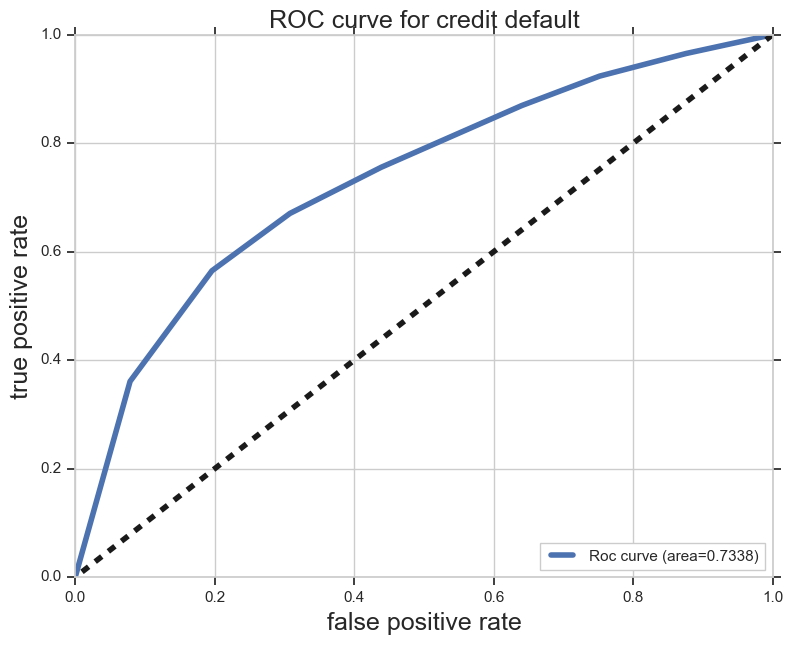

In [358]:
#Plotting ROC
plot_roc(dt_prob,Y_test1) # As you can see the Auc for model is 0.71

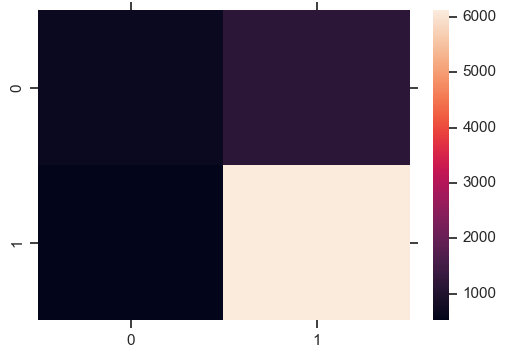

             predicted not default  predicted default
not default                    666               1179
default                        523               6124


In [359]:
# Plotting confusion matrix 
plot_confusion(dt_pred,Y_test1)

In [530]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#dot_data = StringIO()
#export_graphviz(dt, out_file=dot_data,filled=True, rounded=True,special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())
from sklearn import tree
tree.plot_tree(dt_final)


AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [ ]:
# Building a random forestmodel

In [507]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt']}


In [508]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train2, Y_train2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 101.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [509]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 800}

In [511]:
rf_mod = RandomForestClassifier(bootstrap = True,max_depth= 100,max_features = 'sqrt',min_samples_leaf = 4,min_samples_split= 10,n_estimators= 800,verbose=2, random_state=42, n_jobs = -1)
rf_mod.fit(X_train2, Y_train2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 800building tree 2 of 800
building tree 3 of 800

building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800
building tree 11 of 800
building tree 12 of 800
building tree 13 of 800
building tree 14 of 800
building tree 15 of 800
building tree 16 of 800
building tree 17 of 800
building tree 18 of 800
building tree 19 of 800
building tree 20 of 800
building tree 21 of 800
building tree 22 of 800
building tree 23 of 800
building tree 24 of 800
building tree 25 of 800
building tree 26 of 800
building tree 27 of 800
building tree 28 of 800
building tree 29 of 800
building tree 30 of 800
building tree 31 of 800
building tree 32 of 800
building tree 33 of 800building tree 34 of 800

building tree 35 of 800
building tree 36 of 800
building tree 37 of 800
building tree 38 of 800
building tree 39 of 800
building tree 40 of 800
building tree 41 of 800
building tree 42 of 800
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.5s


building tree 45 of 800
building tree 46 of 800
building tree 47 of 800
building tree 48 of 800
building tree 49 of 800
building tree 50 of 800
building tree 51 of 800
building tree 52 of 800
building tree 53 of 800
building tree 54 of 800
building tree 55 of 800
building tree 56 of 800
building tree 57 of 800
building tree 58 of 800
building tree 59 of 800
building tree 60 of 800
building tree 61 of 800
building tree 62 of 800
building tree 63 of 800
building tree 64 of 800
building tree 65 of 800
building tree 66 of 800
building tree 67 of 800
building tree 68 of 800
building tree 69 of 800
building tree 70 of 800
building tree 71 of 800
building tree 72 of 800
building tree 73 of 800
building tree 74 of 800
building tree 75 of 800
building tree 76 of 800
building tree 77 of 800
building tree 78 of 800
building tree 79 of 800
building tree 80 of 800
building tree 81 of 800
building tree 82 of 800
building tree 83 of 800
building tree 84 of 800
building tree 85 of 800
building tree 86

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.1s


building tree 160 of 800
building tree 161 of 800
building tree 162 of 800
building tree 163 of 800
building tree 164 of 800
building tree 165 of 800
building tree 166 of 800
building tree 167 of 800
building tree 168 of 800
building tree 169 of 800
building tree 170 of 800
building tree 171 of 800
building tree 172 of 800
building tree 173 of 800
building tree 174 of 800
building tree 175 of 800
building tree 176 of 800
building tree 177 of 800
building tree 178 of 800
building tree 179 of 800
building tree 180 of 800
building tree 181 of 800
building tree 182 of 800
building tree 183 of 800
building tree 184 of 800
building tree 185 of 800
building tree 186 of 800
building tree 187 of 800
building tree 188 of 800
building tree 189 of 800
building tree 190 of 800
building tree 191 of 800
building tree 192 of 800
building tree 193 of 800
building tree 194 of 800
building tree 195 of 800
building tree 196 of 800
building tree 197 of 800
building tree 198 of 800
building tree 199 of 800


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    9.3s


building tree 368 of 800
building tree 369 of 800
building tree 370 of 800
building tree 371 of 800
building tree 372 of 800
building tree 373 of 800
building tree 374 of 800
building tree 375 of 800
building tree 376 of 800
building tree 377 of 800
building tree 378 of 800
building tree 379 of 800
building tree 380 of 800
building tree 381 of 800
building tree 382 of 800
building tree 383 of 800
building tree 384 of 800
building tree 385 of 800
building tree 386 of 800
building tree 387 of 800
building tree 388 of 800
building tree 389 of 800
building tree 390 of 800
building tree 391 of 800
building tree 392 of 800
building tree 393 of 800
building tree 394 of 800
building tree 395 of 800
building tree 396 of 800
building tree 397 of 800
building tree 398 of 800
building tree 399 of 800
building tree 400 of 800
building tree 401 of 800
building tree 402 of 800
building tree 403 of 800
building tree 404 of 800
building tree 405 of 800
building tree 406 of 800
building tree 407 of 800


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   15.3s


building tree 649 of 800
building tree 650 of 800
building tree 651 of 800
building tree 652 of 800
building tree 653 of 800
building tree 654 of 800
building tree 655 of 800
building tree 656 of 800
building tree 657 of 800
building tree 658 of 800
building tree 659 of 800
building tree 660 of 800
building tree 661 of 800
building tree 662 of 800
building tree 663 of 800
building tree 664 of 800
building tree 665 of 800
building tree 666 of 800
building tree 667 of 800
building tree 668 of 800
building tree 669 of 800
building tree 670 of 800
building tree 671 of 800
building tree 672 of 800
building tree 673 of 800
building tree 674 of 800
building tree 675 of 800
building tree 676 of 800
building tree 677 of 800
building tree 678 of 800
building tree 679 of 800
building tree 680 of 800
building tree 681 of 800
building tree 682 of 800
building tree 683 of 800
building tree 684 of 800
building tree 685 of 800
building tree 686 of 800
building tree 687 of 800
building tree 688 of 800


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   18.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=-1,
            oob_score=False, random_state=42, verbose=2, warm_start=False)

In [513]:
rf_pred = rf_mod.predict(X_test2)
rf_prob = rf_mod.predict_proba(X_test2)[:,1]
print('Test score: ', rf_mod.score(X_test2, Y_test2))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(

Test score:  0.8272491756947715


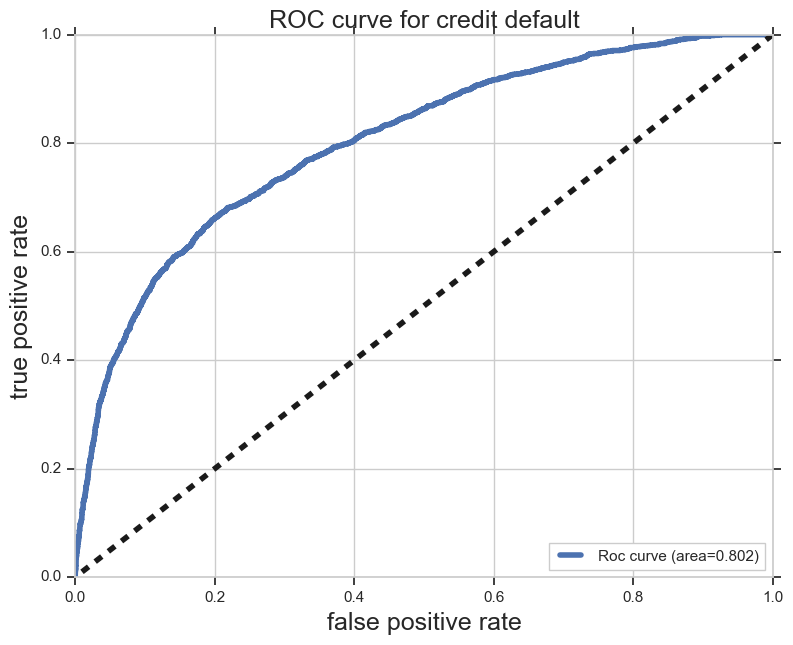

In [514]:
plot_roc(rf_prob,Y_test2)

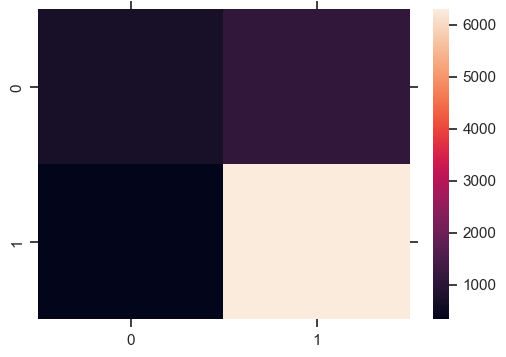

             predicted not default  predicted default
not default                    721               1124
default                        343               6304


In [515]:
plot_confusion(rf_pred,Y_test2)

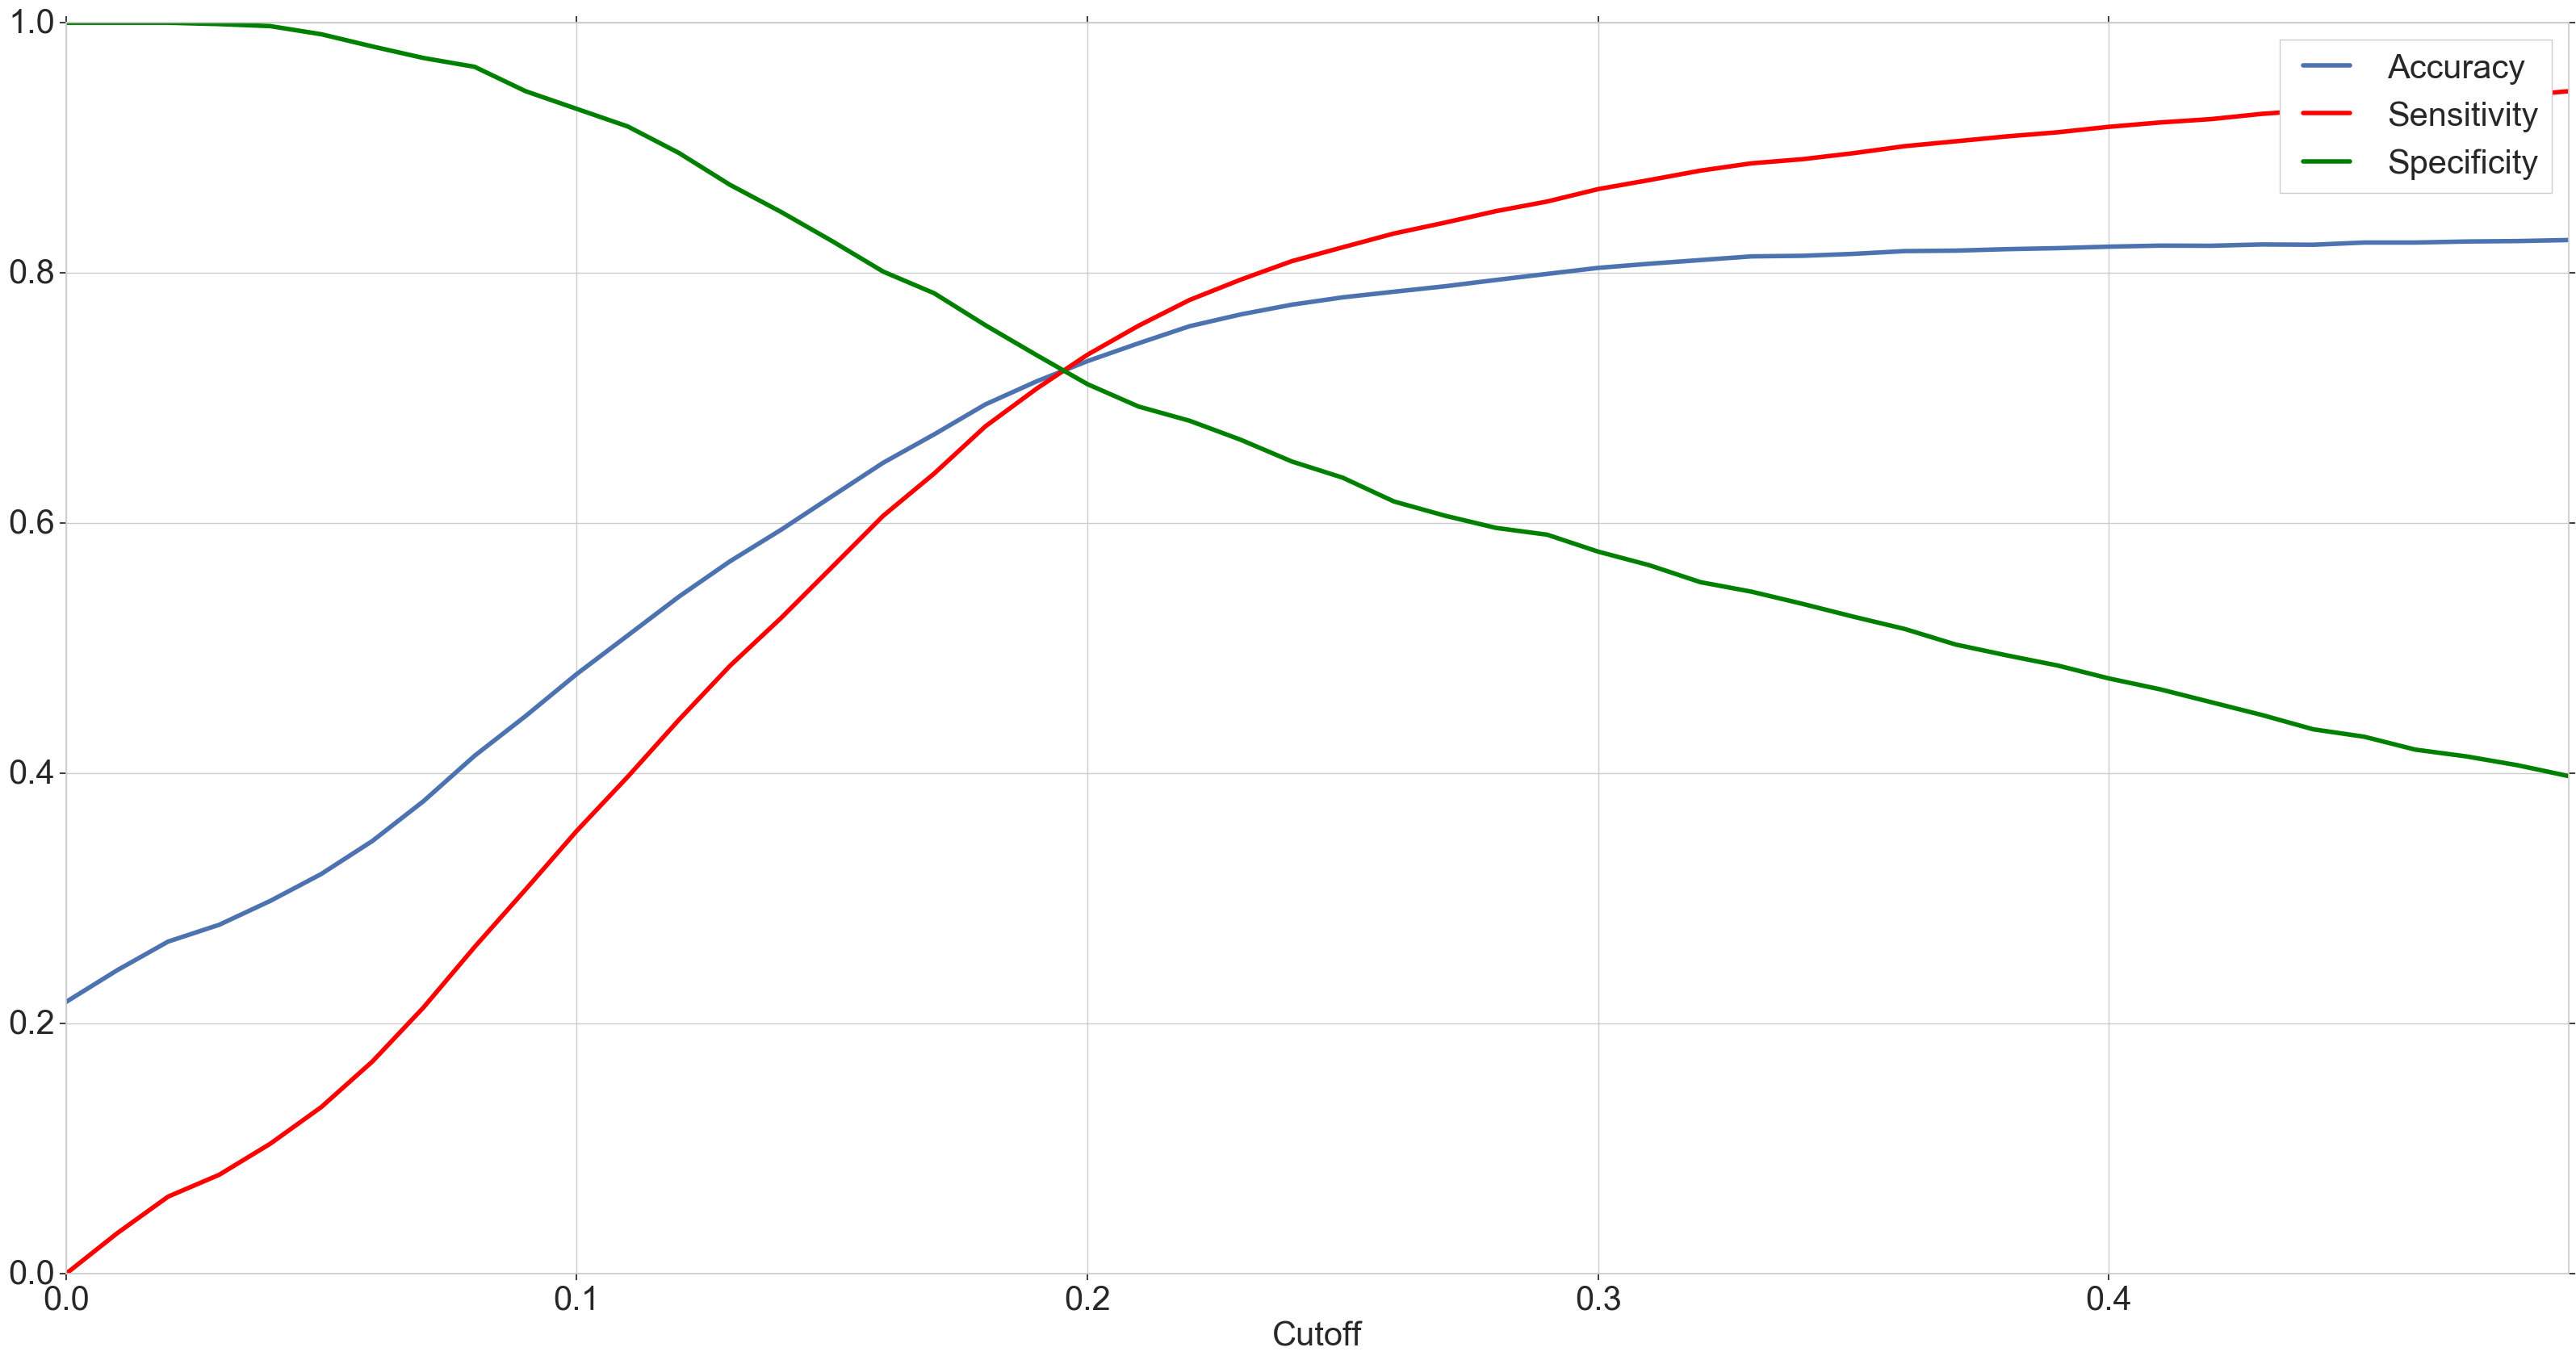

In [520]:
cutoff(rf_prob,0,0.5,Y_test2)

In [369]:
#GBM, XGBoost is a sequential ensemble model of decision trees. After each iteration a new decision tree model is built on the 
#residuals of earlier model & at each iteration a higher weight is assigned to the wrong predictions. 
# GBM Vs XGBoost Model
# XGBoost is much better than GBM BCOZ:-
# Standard GBM has no regularization like XGBoost 
# XGBoost implements parallel processing therefore much faster as compared to GBM
# XGBoost has greater flexibility as it allows user to define custom optimization parameter
# GBM is a greedy algorithm it stops splitting the tree when the loss becomes negative whereas GBM splits the tree upto max_depth specified
# XGBoost has in built mechanism to handle missing values and cross validation


# Therefore buiding an XGBoost Model
#mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin'

#os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb
from sklearn import metrics

In [477]:
# Function for building model and plotting feature importance 
def xgboostmodel(alg,dtrain,dtest,predictors,cv_folds=5,early_stopping_rounds=50):
        #Getting xgb parameters
        xgb_params = alg.get_xgb_params()
        xg_train = xgb.DMatrix(dtrain[predictors].values,label=dtrain["default.payment.next.month"].values)
        cv_result = xgb.cv(xgb_params,xg_train, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cv_result.shape[0])
        
        #Fitting the algorithm on the data
        gb = alg.fit(dtrain[predictors], dtrain['default.payment.next.month'],eval_metric='auc')
    
        #Predict training set:
        dtrain_predictions = gb.predict(dtrain[predictors])
        dtrain_predprob = gb.predict_proba(dtrain[predictors])[:,1]
        dtest_predictions = gb.predict(dtest[predictors])
        dtest_predprob = gb.predict_proba(dtest[predictors])[:,1]
        
        #Print model report:
        print("\nModel Report")
        print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['default.payment.next.month'].values, dtrain_predictions))
        print("AUC Score (Train): %s" % metrics.roc_auc_score(dtrain['default.payment.next.month'], dtrain_predprob))
        print("AUC Score (Test): %s" % metrics.roc_auc_score(dtest['default.payment.next.month'], dtest_predprob))
        
        features = dtrain.loc[:,dtrain.columns != 'default.payment.next.month'].columns
        importances_xgb = gb.feature_importances_    
        indices = np.argsort(importances_xgb)[-20:]  # top 20 features
        plt.figure(figsize=(60,30))
        plt.title('Feature Importances',fontsize=40)
        plt.barh(range(len(indices)), importances_xgb[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [features[i] for i in indices])
        plt.ylabel('Relative Importance',fontsize=40)
        plt.xticks(fontsize = 35)
        plt.yticks(fontsize = 35)
        plt.show()
        
        return dtest_predictions,dtest_predprob,indices

In [379]:
# First we'll be building model on all parameters 
# initially we'll be setting some values for the model and then we'll tune the model
#max_depth =5 (this should be between 3-10), min_child_weight = 1(A smaller value is chosen as its a highly imbalanced data)
#gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
#subsample, colsample_bytree = 0.8 : This is a commonly used as a starting value. Typical values range between 0.5-0.9.
#scale_pos_weight = 1: Because of high class imbalance.

predictors = [x for x in X_train1.columns]
xgb1 = xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)

In [415]:
# Creating test and train set for xgboost
train_xg = pd.concat([X_train1,Y_train1],axis=1,sort=False)
test_xg = pd.concat([X_test1,Y_test1],axis=1,sort=False)


Model Report
Accuracy : 0.8333
AUC Score (Train): 0.8149811310127295
AUC Score (Test): 0.7962624294514344


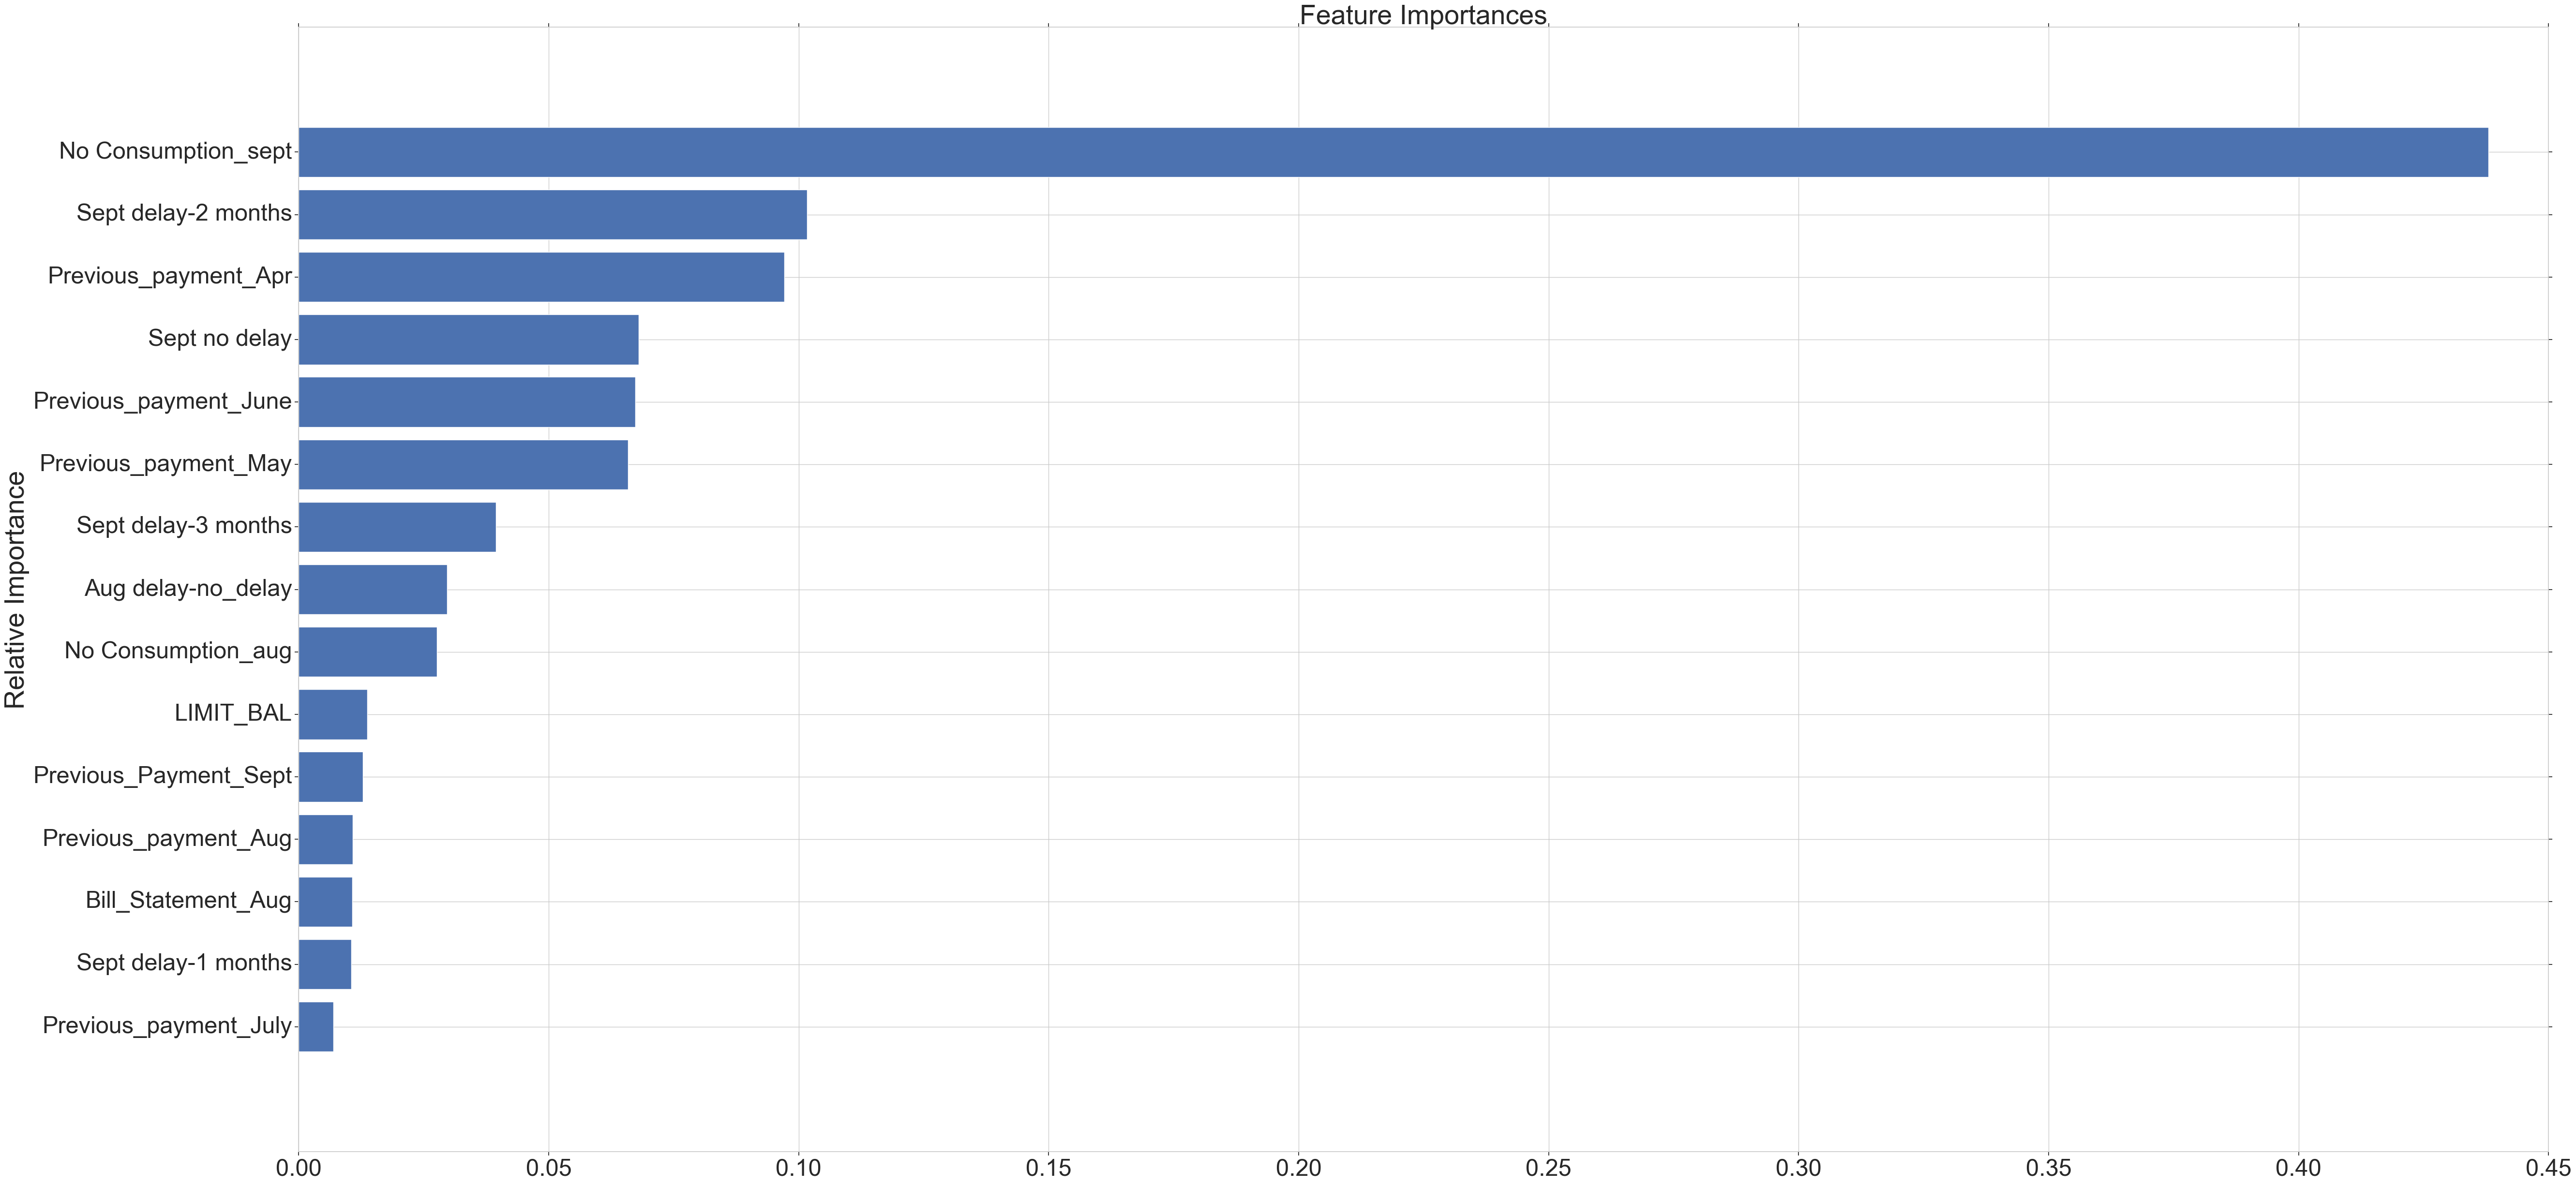

In [444]:
xg1pred,xg1prob = xgboostmodel(xgb1,train_xg,test_xg,predictors)

In [383]:
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
xgb2 = xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb_pred = gridsearch(xgb2,param_test1,X_train1,Y_train1,X_test1,Y_test1,2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 29.6min finished


Best params:  {'max_depth': 3, 'min_child_weight': 1}
Best auc on training set:  0.7804189767022454
Best auc on test set:  0.7886980821064415


In [386]:
param_test2 = {'max_depth':[2,3,4]}
xgb2 = xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb_pred = gridsearch(xgb2,param_test2,X_train1,Y_train1,X_test1,Y_test1,2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.7min finished


Best params:  {'max_depth': 2}
Best auc on training set:  0.7871559650399509
Best auc on test set:  0.7944219594144188


In [403]:
param_test3 = {'min_child_weight':[1,2,3,5]}
xgb2 = xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=2,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb_pred = gridsearch(xgb2,param_test3,X_train1,Y_train1,X_test1,Y_test1,2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.6min finished


Best params:  {'min_child_weight': 2}
Best auc on training set:  0.7872493325412674
Best auc on test set:  0.7941566238289133


In [405]:
# Tuning gamma 
param_test4 = {'gamma':[i/10.0 for i in range(0,5)]}
xgb3 = xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=2,min_child_weight=2,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb_pred = gridsearch(xgb3,param_test4,X_train1,Y_train1,X_test1,Y_test1,2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.6min finished


Best params:  {'gamma': 0.3}
Best auc on training set:  0.7874809964633439
Best auc on test set:  0.7946930436658061


In [455]:
# Tuning subsample and colsamplr_bytree
param_test5 = {'subsample':[i/10.0 for i in [4,5,7,8]],'colsample_bytree':[i/10.0 for i in [3,5,6,7,8]]}
xgb4 = xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=2,min_child_weight=2,gamma=0.3,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb_pred = gridsearch(xgb4,param_test5,X_train1,Y_train1,X_test1,Y_test1,2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 19.6min finished


Best params:  {'colsample_bytree': 0.3, 'subsample': 0.8}
Best auc on training set:  0.7881832492507002
Best auc on test set:  0.7925744768204414


In [408]:
param_test6 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
xgb5 = xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=2,min_child_weight=2,gamma=0.3,subsample=0.5,colsample_bytree=0.3,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb_pred = gridsearch(xgb5,param_test6,X_train1,Y_train1,X_test1,Y_test1,2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.4min finished


Best params:  {'reg_alpha': 1}
Best auc on training set:  0.7881314625999887
Best auc on test set:  0.792112218850487


In [409]:
param_test7 = {'reg_alpha':[0, 0.001, 0.05, 0.5,1]}
xgb6 = xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=2,min_child_weight=2,gamma=0.3,subsample=0.5,colsample_bytree=0.3,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb_pred = gridsearch(xgb6,param_test6,X_train1,Y_train1,X_test1,Y_test1,2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.4min finished


Best params:  {'reg_alpha': 1}
Best auc on training set:  0.7881314625999887
Best auc on test set:  0.792112218850487



Model Report
Accuracy : 0.8332
AUC Score (Train): 0.820228570007598
AUC Score (Test): 0.7984064372011255


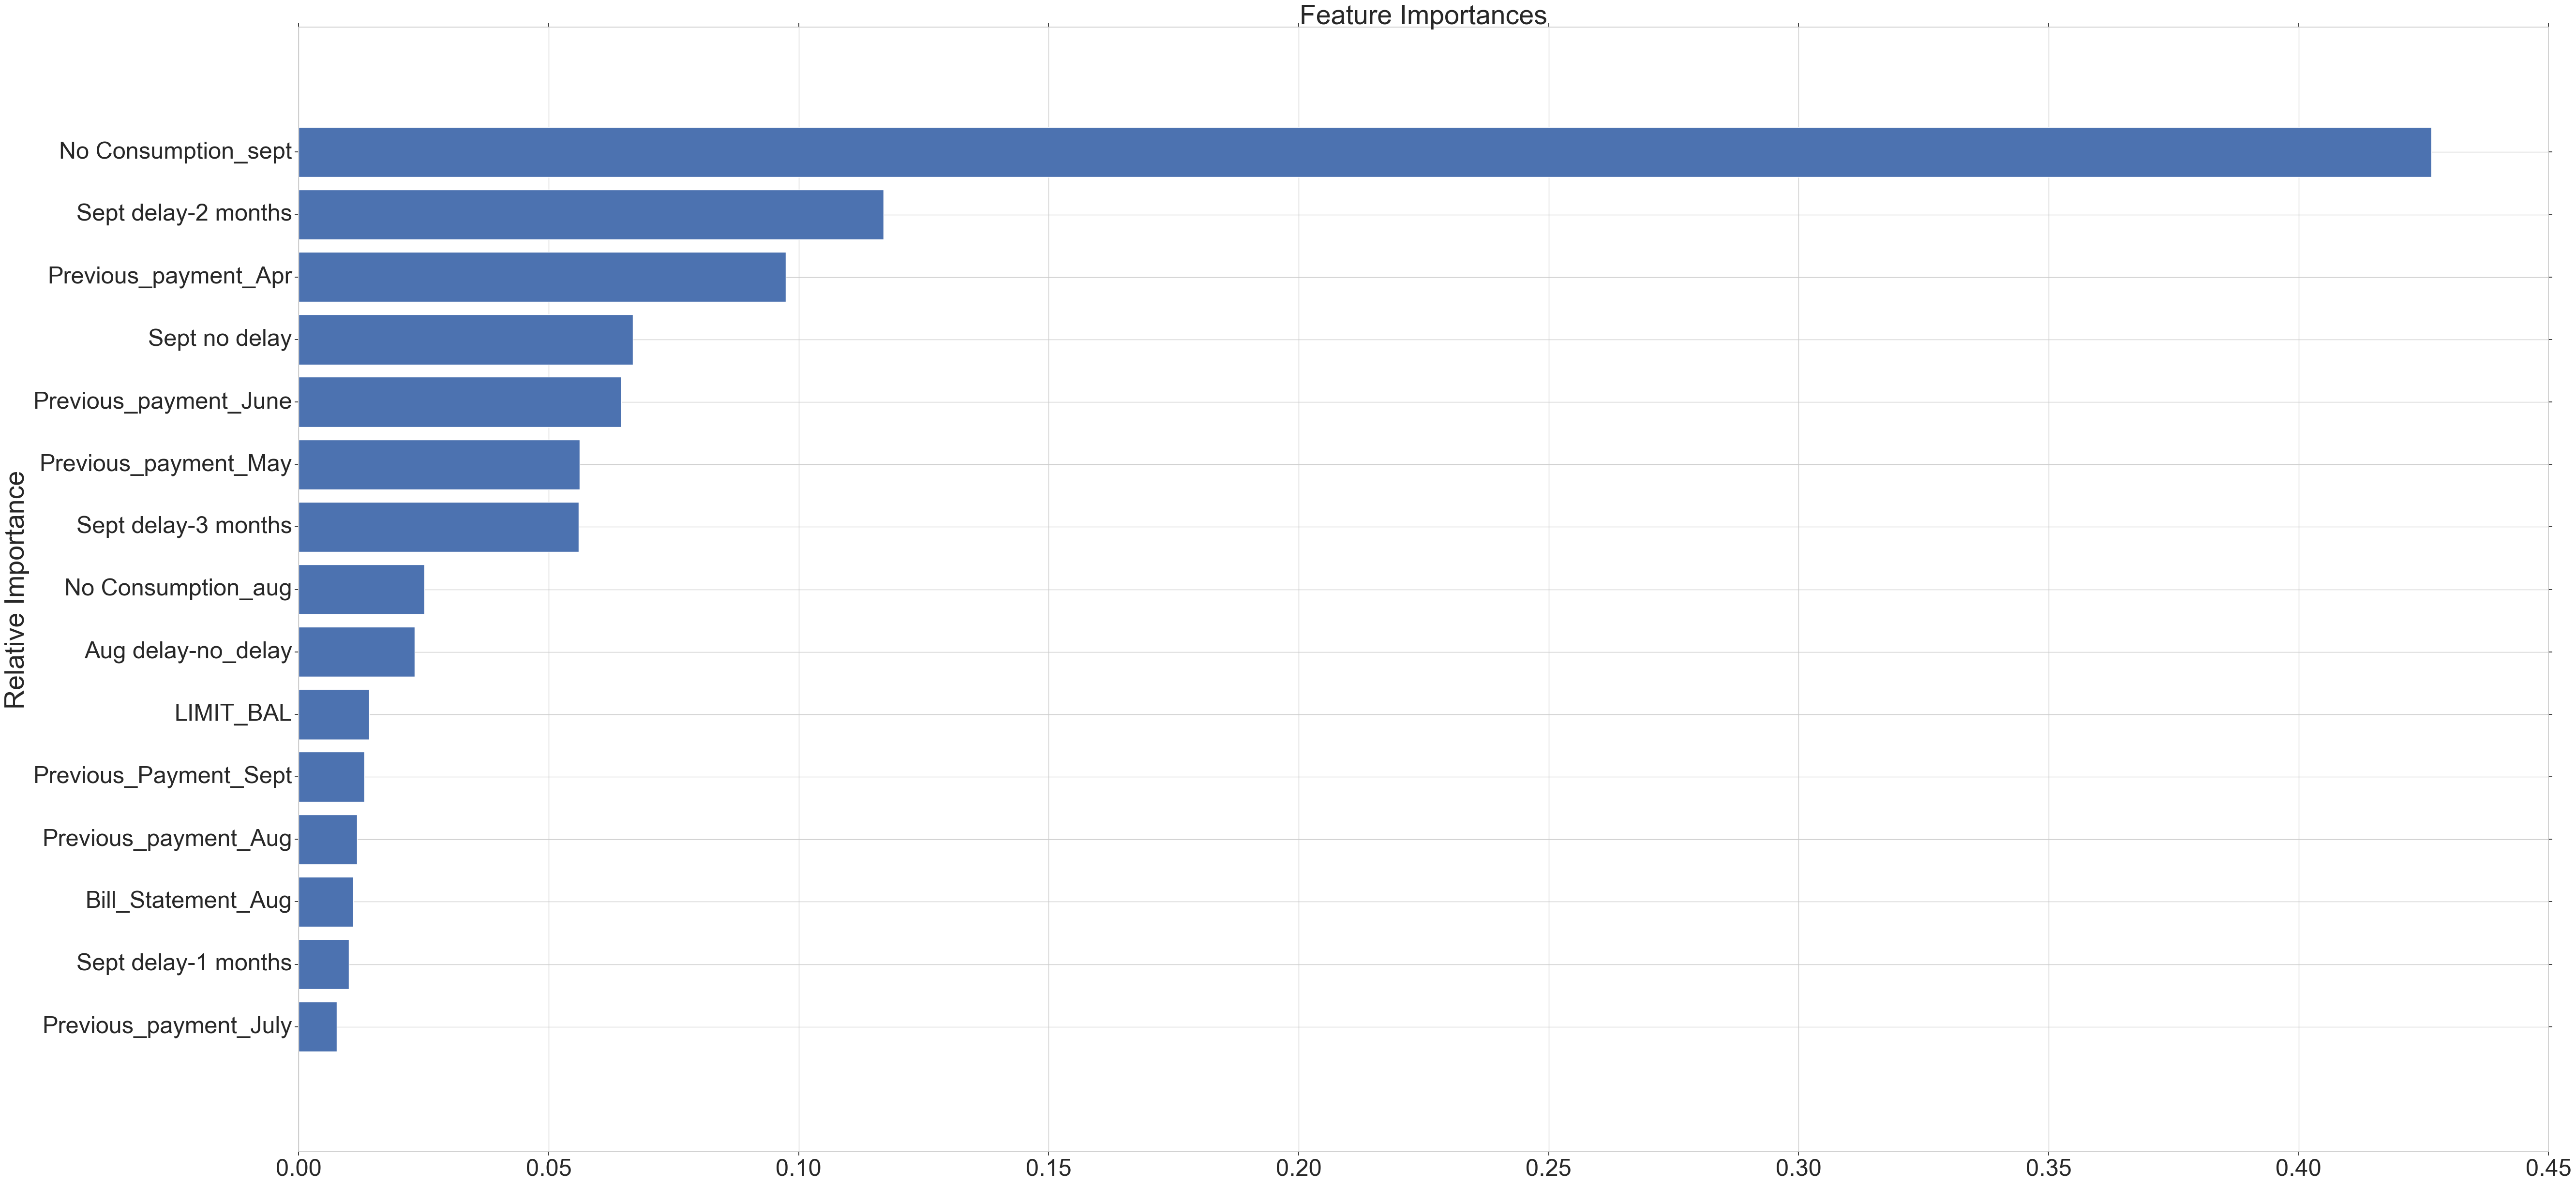

In [460]:
# Lowering the learning rate ,adding more trees and applying this regularization in xgboost model
xgb7 = xgb.XGBClassifier(learning_rate =0.01,n_estimators=5000,max_depth=5,min_child_weight=2,gamma=0.3,subsample=0.8,colsample_bytree=0.8,reg_alpha=1,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xg_pred,xg_prob,indices = xgboostmodel(xgb7,train_xg,test_xg,predictors)

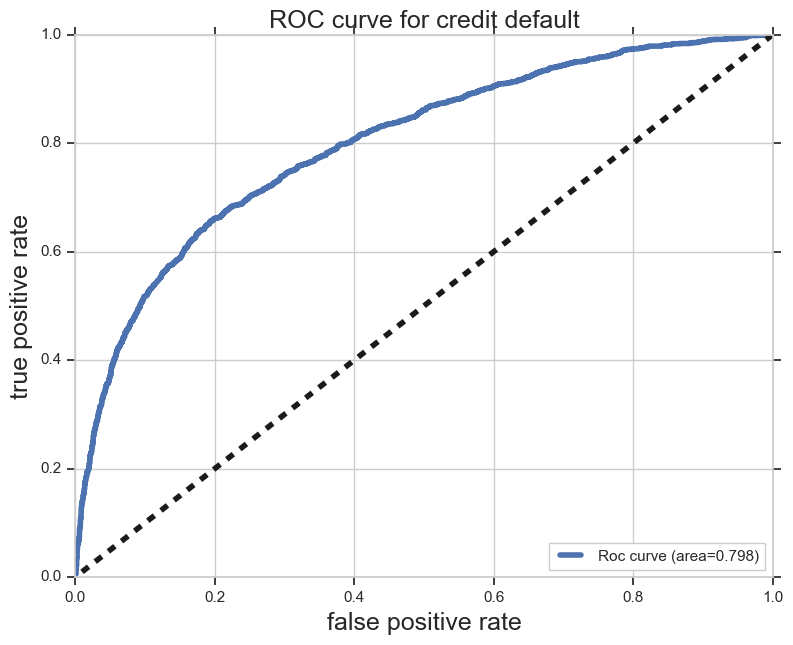

In [461]:
plot_roc(xg_prob,Y_test1)

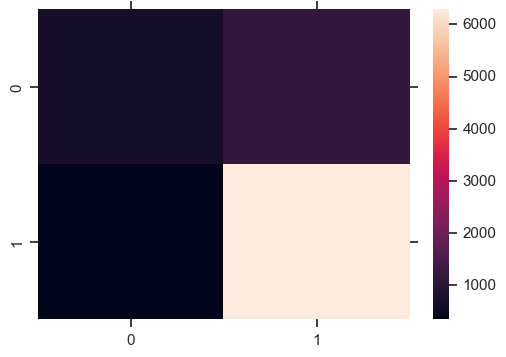

             predicted not default  predicted default
not default                    707               1138
default                        355               6292


In [397]:
plot_confusion(xg_pred,Y_test1)

In [466]:
train_xg2 = pd.concat([X_train2,Y_train2],axis=1,sort= False)
test_xg2 = pd.concat([X_test2,Y_test2],axis=1,sort= False)


Model Report
Accuracy : 0.8354
AUC Score (Train): 0.8325045195089391
AUC Score (Test): 0.8053600805302472


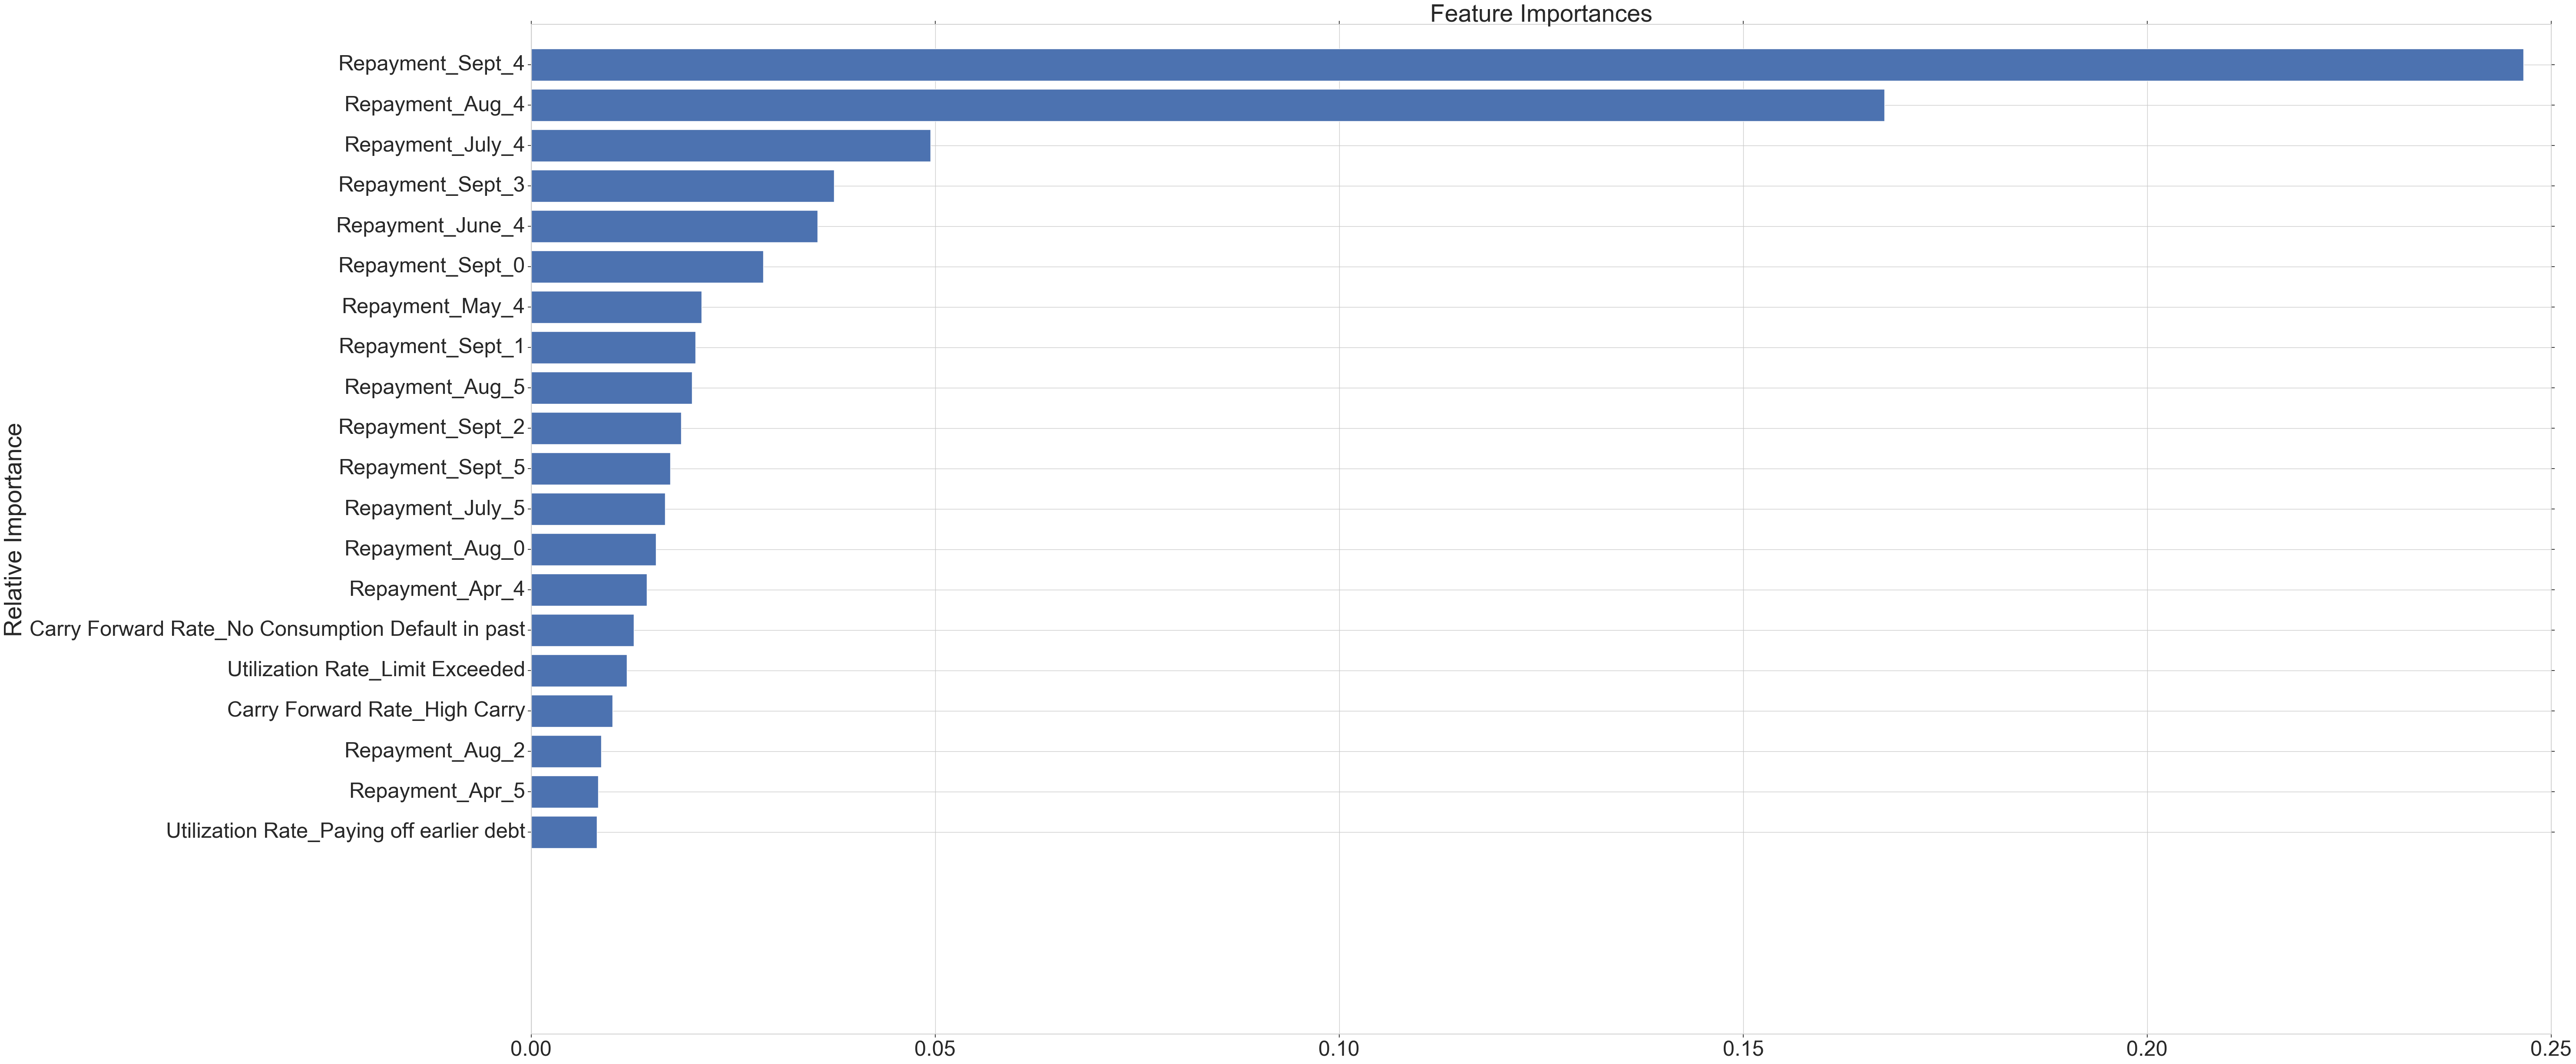

In [478]:
predictors = [x for x in X_train2.columns]
xgb3 = xgb.XGBClassifier(learning_rate =0.01,n_estimators=5000,max_depth=5,min_child_weight=2,gamma=0.3,reg_alpha=1,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xg3_pred,xg3_prob,indices = xgboostmodel(xgb3,train_xg2,test_xg2,predictors)

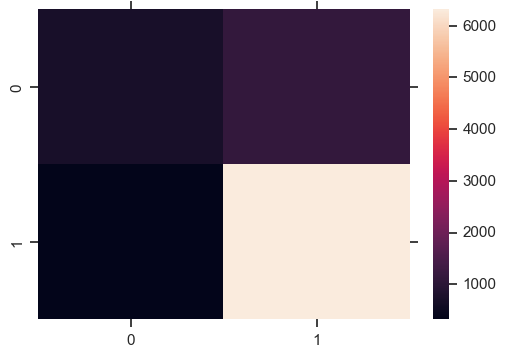

             predicted not default  predicted default
not default                    706               1139
default                        327               6320


In [486]:
plot_confusion(xg3_pred,Y_test2)

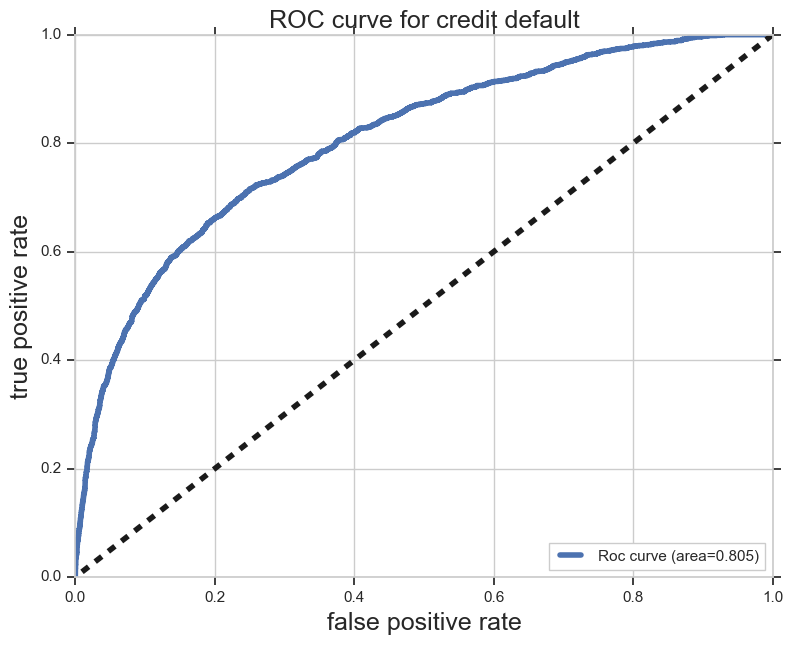

In [487]:
plot_roc(xg3_prob,Y_test2)

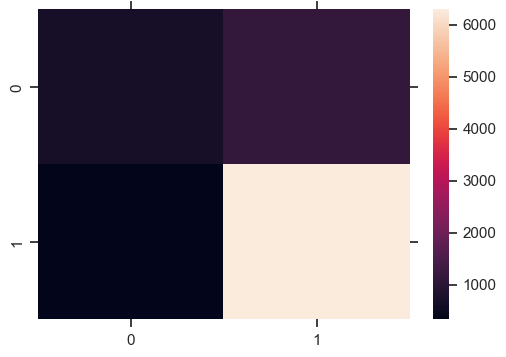

             predicted not default  predicted default
not default                    696               1149
default                        341               6306


In [ ]:
plot_roc(xg_prob,Y_test11)

In [ ]:
cutoff(xg_prob,0,0.5,Y_test11)